In [1]:
! pip install seaborn
! pip install matplotlib
! pip install numpy
! pip install -U spacy
! python -m spacy info
! python -m spacy download en_core_web_lg
! python -m spacy download en_core_web_sm
! pip install -U scikit-learn
! pip install wordcloud

2023-08-28 02:45:40.829564: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-28 02:45:41.738319: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-28 02:45:43.232866: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-28 02:45:43.233330: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! pip install -U spacy_fastlang


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 25.8 MB/s eta 0:00:00


In [4]:
# INSTALL SOME PROGRAMS AND PACKAGES FOR USE LATER
#Installs

#Import packages
# Language model
import spacy

#Basics
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np
import random
import uuid

#Check language from datacleaning
import spacy_fastlang

# Test Train split
from sklearn.model_selection import train_test_split

# Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Dimensionreduction
from sklearn.manifold import TSNE # Get the T-Dist. Stochastic Neighbor Embedding
import sklearn
# Experiment setup
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.svm import LinearSVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier

#Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

#Ml tools
# from sklearn.metrics import classification_report
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import f1_score, make_scorer
# from sklearn.metrics.pairwise import cosine_similarity


# from sklearn.metrics import plot_confusion_matrix



Unique IDs  1117  
 Total number of rows  1186
Unique IDs  858  
 Total number of rows  858
Unique IDs  2195  
 Total number of rows  2600
Total number of rows 4644
Unique IDs  4644 
 Total Number of Unique comments  3228  
 Total number of rows  4644


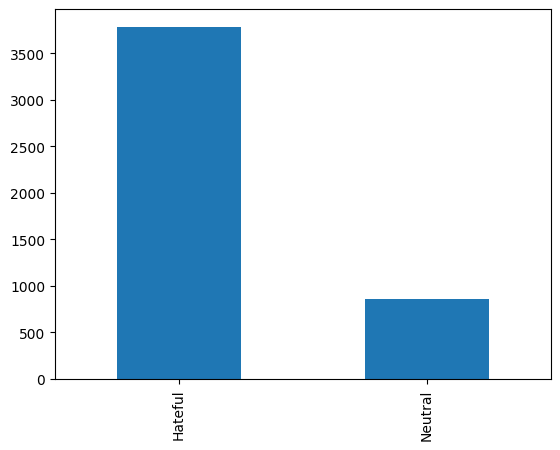

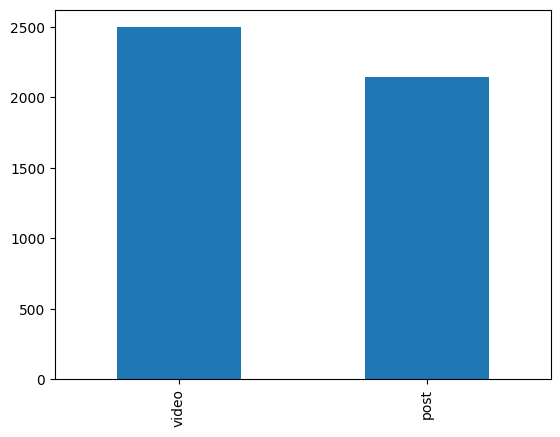

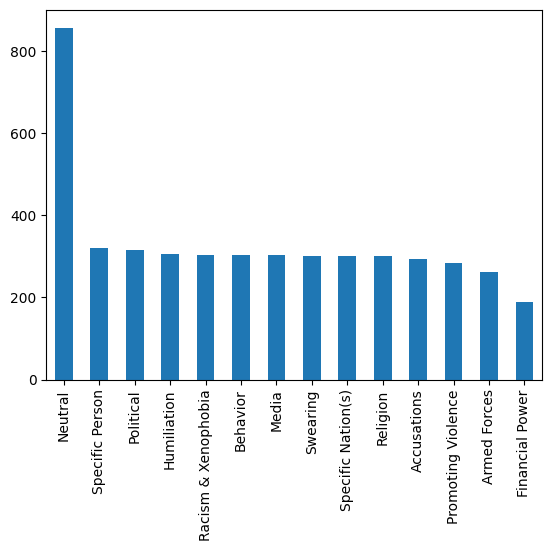

(array([1.198e+03, 9.880e+02, 8.870e+02, 6.110e+02, 3.470e+02, 2.020e+02,
        1.480e+02, 7.800e+01, 4.300e+01, 5.300e+01, 2.000e+01, 1.200e+01,
        1.300e+01, 1.100e+01, 8.000e+00, 1.100e+01, 4.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00]),
 array([2.00000e+00, 8.91200e+01, 1.76240e+02, 2.63360e+02, 3.50480e+02,
        4.37600e+02, 5.24720e+02, 6.11840e+02, 6.98960e+02, 7.86080e+02,
        8.73200e+02, 9.60320e+02, 1.04744e+03, 1.13456e+03, 1.22168e+03,
        1.30880e+03, 1.39592e+03, 1.48304e+03, 1.57016e+03, 1.65728e+03,
        1.74440e+03, 1.83152e+03, 1.91864e+03, 2.00576e+03, 2.09288e+03,
        2.18000e+03]),
 <BarContainer object of 25 artists>)

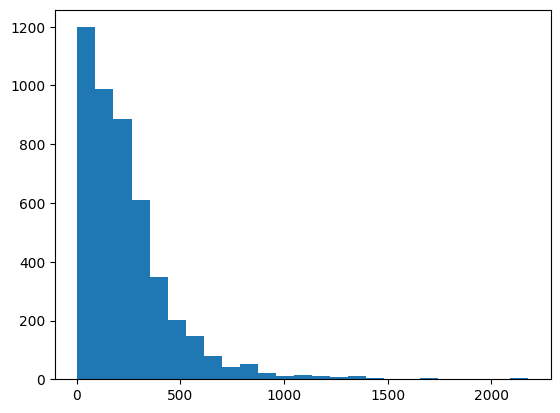

In [5]:
#New datasets
# Datasets were split prior to coding to get an overview in excel


How_labels = pd.read_csv('/content/drive/MyDrive/Text Mining - TDDE16/Project Aug 2023/Dataset/Hate_speech_taxonomy_w_Category_HOW.csv', delimiter=';', quotechar='"', encoding = "utf-8")
Neutral_labels = pd.read_csv('/content/drive/MyDrive/Text Mining - TDDE16/Project Aug 2023/Dataset/Hate_speech_taxonomy_w_Category_What_Neutral.csv', delimiter=';', quotechar='"', encoding = "utf-8")
What_labels = pd.read_csv('/content/drive/MyDrive/Text Mining - TDDE16/Project Aug 2023/Dataset/Hate_speech_taxonomy_w_Category_WHAT.csv', delimiter=';', quotechar='"', encoding = "utf-8")

# Exploration

# Data from the How - category
How_labels = pd.DataFrame(How_labels)

# Data from the What - category
What_labels = pd.DataFrame(What_labels)

# Data from the Neutral - category
Neutral_labels = pd.DataFrame(Neutral_labels)


# Some metadata about the dataset

#Unique IDs per category
print('Unique IDs ', len(How_labels['ID'].unique()), ' \n Total number of rows ', len(How_labels))
print('Unique IDs ', len(Neutral_labels['ID'].unique()), ' \n Total number of rows ', len(Neutral_labels))
print('Unique IDs ', len(What_labels['ID'].unique()), ' \n Total number of rows ', len(What_labels))
# print('Unique IDs ', len(hate_speech['ID'].unique()), ' \n Total number of rows ', len(hate_speech))

print(f'Total number of rows {len(What_labels) + len(How_labels) + len(Neutral_labels)}') #OK

# Concatenate all the dataframes
ML_all_rows = pd.concat( [How_labels, What_labels, Neutral_labels] , ignore_index=True)

ML_all_rows['unique_id'] = ML_all_rows.apply(lambda x: uuid.uuid4(), axis=1)

print('Unique IDs ', len(ML_all_rows['unique_id'].unique()), '\n Total Number of Unique comments ', len(ML_all_rows['ID'].unique()), ' \n Total number of rows ', len(ML_all_rows))


ML_all_rows['Class'].value_counts().plot(kind='bar')
plt.show()
ML_all_rows['type'].value_counts().plot(kind='bar')
plt.show()
ML_all_rows['Category'].value_counts().plot(kind='bar')
plt.show()
# What is the distribution of message length
ML_all_rows['#Characters'] = ML_all_rows.message.str.len()
lens = ML_all_rows.message.str.len()
plt.hist(lens, bins=25)

# Data preprocessing - Remove empty samples and categories with small sample count. Also remove "How"- labels

In [6]:
# Clean data from empty indexes
#def remove_empty(data):
def is_empty(value):
      return not isinstance(value, str)

   # Apply the function to the desired column
empty = ML_all_rows['message'].apply(is_empty)

empty_index = empty[empty].index
print("non-string cells:", empty_index)

#Remove non-string cells
if not empty_index.empty:
   id_value = ML_all_rows.loc[empty_index[0], "ID"]
   ML_all_rows = ML_all_rows[ML_all_rows['ID'] != id_value]

#remove_empty(ML_all_rows)

non-string cells: Int64Index([4606], dtype='int64')


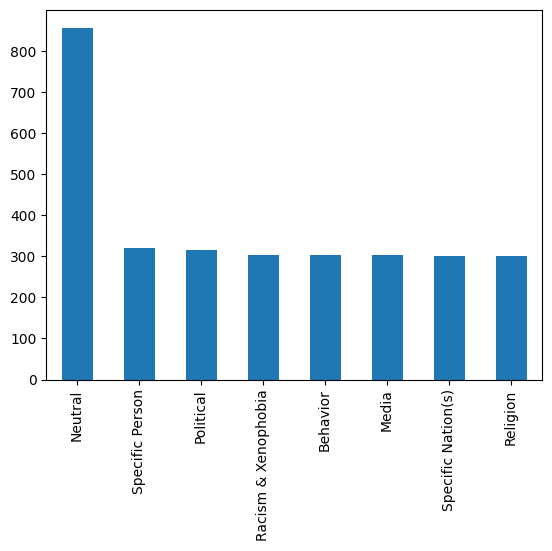

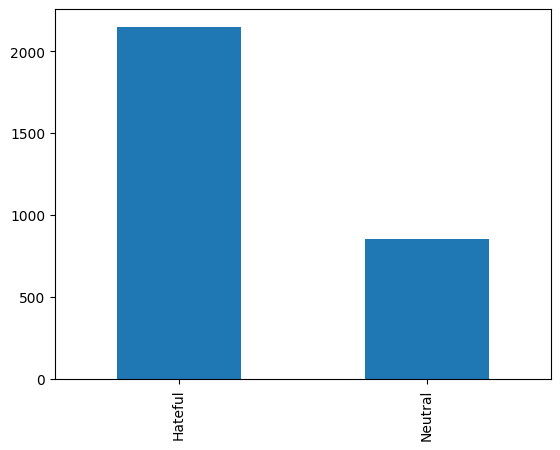

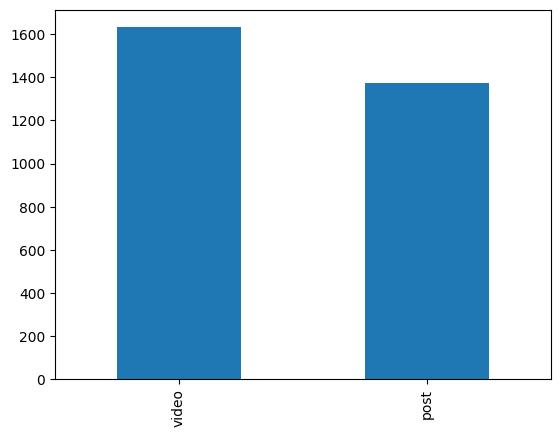

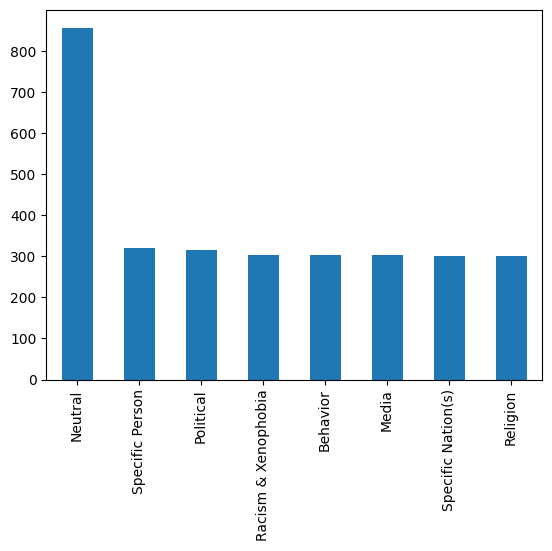

(array([797., 648., 547., 389., 225., 123., 100.,  58.,  28.,  34.,  12.,
          7.,   6.,   8.,   7.,   6.,   3.,   0.,   1.,   3.,   0.,   1.,
          0.,   0.,   3.]),
 array([2.00000e+00, 8.91200e+01, 1.76240e+02, 2.63360e+02, 3.50480e+02,
        4.37600e+02, 5.24720e+02, 6.11840e+02, 6.98960e+02, 7.86080e+02,
        8.73200e+02, 9.60320e+02, 1.04744e+03, 1.13456e+03, 1.22168e+03,
        1.30880e+03, 1.39592e+03, 1.48304e+03, 1.57016e+03, 1.65728e+03,
        1.74440e+03, 1.83152e+03, 1.91864e+03, 2.00576e+03, 2.09288e+03,
        2.18000e+03]),
 <BarContainer object of 25 artists>)

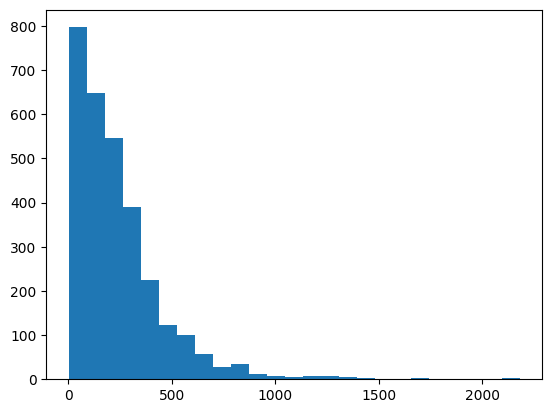

In [7]:
# Clean dataset from labels with category count < 300
ML_all_rows = ML_all_rows[ML_all_rows.groupby('Category')['Category'].transform('count') >= 300]

ML_all_rows = ML_all_rows[~ML_all_rows['Category'].isin(['Humiliation', 'Swearing'])]

# Make numeric values for Class and Category
Categories = ML_all_rows['Category'].unique()
Categories_map = {Categories: idx + 1 for idx, Categories in enumerate(Categories)}
ML_all_rows['numeric_category'] = ML_all_rows['Category'].map(Categories_map)

Class = ML_all_rows['Class'].unique()
Class_map = {Class: idx + 1 for idx, Class in enumerate(Class)}
ML_all_rows['numeric_class'] = ML_all_rows['Class'].map(Class_map)

ML_all_rows['Category'].value_counts().plot(kind='bar')
plt.show()
ML_all_rows['Class'].value_counts().plot(kind='bar')
plt.show()
ML_all_rows['type'].value_counts().plot(kind='bar')
plt.show()
ML_all_rows['Category'].value_counts().plot(kind='bar')
plt.show()
# What is the distribution of message length
ML_all_rows['#Characters'] = ML_all_rows.message.str.len()
lens = ML_all_rows.message.str.len()
plt.hist(lens, bins=25)

In [8]:
#Create preprocess function (from labs)
nlp = spacy.load("en_core_web_lg")#, disable=['parser','ner']) # Define the language model we want to use


def preprocess(text):
      # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-ASCII characters
    text = text.encode("ascii", errors="ignore").decode()
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    doc = nlp(text) ## Creates a nlp-object from the text input, text is encoded as tokens
    result = [] # Empty results array
    for token in doc: #loop over each token
      if not token.is_stop and token.lemma_.isalpha(): #remove stopwords and make all letters small. Stop words are words such as a, the, an etc.
        t = token.lemma_.lower()
                                                      # Lemmatization combines all inflections of a word to it's nautral word.
        result.append(token.lemma_.lower()) #Add token to results
    return  result#' '.join(result)


ML_all_rows['message_array'] = ML_all_rows['message'].apply(preprocess)
ML_all_rows['message_cleaned'] = ML_all_rows['message_array'].apply(' '.join)


In [9]:

def get_vec(x):
  doc = nlp(x)
  return doc.vector
ML_all_rows['message_vec']  = ML_all_rows['message_cleaned'].apply(lambda x: get_vec(x))



In [10]:
def vectorize_sentences(df, column):

   def vectorize_tokens(tokens):
      return [nlp(token).vector for token in tokens]

   df['vector'] = df[column].apply(vectorize_tokens)
   return(df)

# Convert data to table with separate column for each category
# No longer needed - discard

In [11]:
# Creating dataset for multilabel classification
# |ID | Category | Title | Type | Message | Class | Political | Financial | Armed Forces | etc.

# Create multilabel table
hs_Getdummies = ML_all_rows[['ID', 'Category']]
hs_multilabel = pd.get_dummies(hs_Getdummies, columns=['Category']).fillna(0).astype(int)
# Group by ID
labels_ML = hs_multilabel.groupby('ID').sum().reset_index()

# Make sure that values are between 0 and 1
for column in labels_ML.columns:
    if column != 'ID':
        labels_ML[column] = labels_ML[column].apply(lambda x: 1 if x > 1 else x)

labels_ML.drop_duplicates()

features_ML = []
features_ML = ML_all_rows[['ID', 'title', 'type', 'message', 'message_cleaned', 'message_array', 'Class']]

#features = features_neutral.merge(features_what, on='ID', how='inner').fillna(0)
#features_ML = features_ML.drop_duplicates()
features_ML = features_ML.drop_duplicates(subset='ID', keep='first')

print(len(labels_ML['ID'].unique()))
print(len(features_ML['ID'].unique()))

labels_ML.columns = labels_ML.columns.str.replace('Category_', '')

labels_ML.head()



2708
2708


,ID,Behavior,Media,Neutral,Political,Racism & Xenophobia,Religion,Specific Nation(s),Specific Person
0,93,0,0,0,0,0,1,0,0
1,97,0,0,0,1,0,0,0,0
2,106,0,0,0,0,1,0,0,0
3,107,0,0,0,0,0,1,0,0
4,125,0,0,0,0,0,1,0,0


# Check language and that non of the samples are in different languages

In [12]:
#Check the language of the dataset

nlp = spacy.load("en_core_web_lg") #Example code used small model,
nlp.add_pipe("language_detector")
def lang_check (df):
   check = True
   df = df['message']
   i = 0
   for doc in df:
      #print(i)
      i+=1
      lang = nlp(doc)
      lang = lang._.language
      if lang != 'en':
         print('This document was classified as ', lang, '\n here is the complete document')
         print(doc, '\n')
         #check = False
   return #check

lang_check(features_ML)
# We see that all flagged samples are in English


This document was classified as  pt 
 here is the complete document
slice em all alive haha 

This document was classified as  sv 
 here is the complete document
WTF YOU SIIK CHINESE BASTARRRRRDZ 

This document was classified as  sr 
 here is the complete document
THOSE HEARTLESS PIECES OF SHIT!!! HOW WOULD THEY LIKE IT IF THEY WERE SAWED ALIVE, POOR THING, ITS SO SAD LOOKING AT THE SHARKS FACE WHEN THOSE SHITS ARE CUTTING HIM OPEN!!! 

This document was classified as  de 
 here is the complete document
HEY!!!! ITS CRUEL TO THESE POOR ANIMALS!!! I HATE THE PPL WHO KILL THE WHALE! WHATS MORE IMPORTANT,MONEY OR A POOR WHALE'S LIFE??? 

This document was classified as  es 
 here is the complete document
oh men, I hate humanity so much!! 

This document was classified as  es 
 here is the complete document
what a bunch of idiots 

This document was classified as  it 
 here is the complete document
you sick bastards 

This document was classified as  pl 
 here is the complete document
#Fre

# Se correlation between different categories

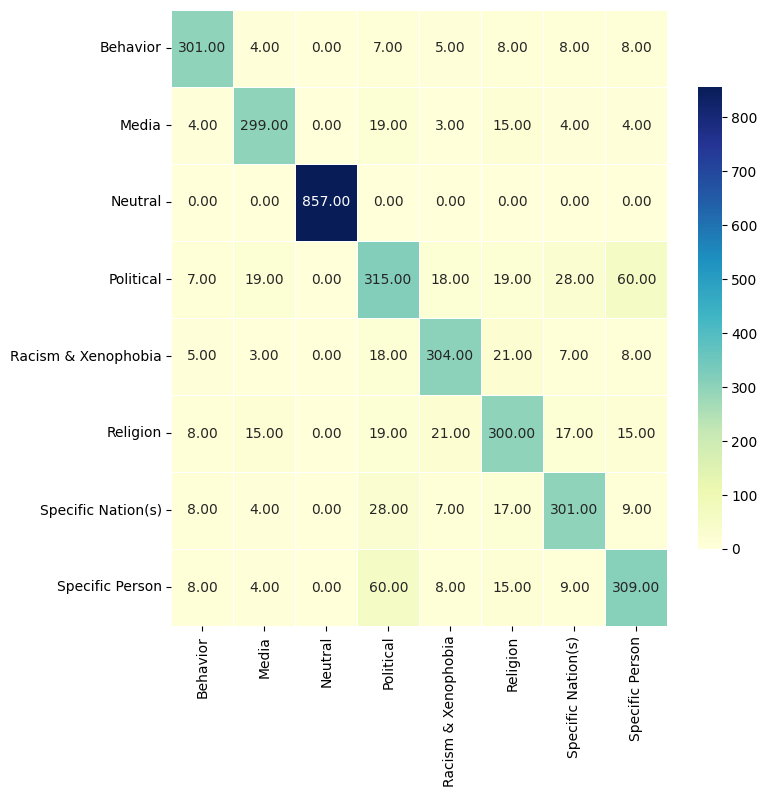

In [13]:

# Plot matrix of how the labels are distributed between eachother
def plot_label_matrix(data):
    num_labels = labels_ML.shape[1]
    #print(num_labels)
    result = pd.DataFrame(0, index=labels_ML.columns, columns=labels_ML.columns)
    #print(result)
    for i in range(num_labels):
         for j in range(num_labels):
             result.iloc[i, j] = ((labels_ML.iloc[:, i] == 1) & (labels_ML.iloc[:, j] == 1)).sum()

    result.drop(['ID'], axis=1, inplace=True)
    result.drop(['ID'], axis=0, inplace=True)



    # Set up the matplotlib figure
    plt.figure(figsize=(len(result), len(result)))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(result, annot=True, fmt=".2f", linewidths=.5, cmap="YlGnBu", cbar_kws={"shrink": 0.75})

    plt.show()
plot_label_matrix(labels_ML)

# Data split function

In [14]:
#features = data_features.sort_values('ID')
#labels = data_labels.sort_values('ID')

def data_split(data_features, data_labels, split_ratio=0.3, random_seed=None):

    # Ensure that 'data_features' and 'data_labels' have the same row order.

    features_train, features_test, labels_train, labels_test = train_test_split(
        data_features, data_labels, test_size=split_ratio, random_state=random_seed)

    return [features_train, features_test, labels_train, labels_test]

n = 1
random_seeds = np.random.randint(0, 10000, size=n)  # Generating 5 random seeds between 0 and 9999

for seed in random_seeds:
    features_train_ML, features_test_ML, labels_train_ML, labels_test_ML  = data_split(features_ML, labels_ML, 0.3, seed)


print(labels_train_ML)

          ID  Behavior  Media  Neutral  Political  Racism & Xenophobia  \
1513  192440         0      0        0          1                    0   
131     2227         0      1        0          0                    0   
2262  271821         0      0        0          1                    0   
789    51230         0      1        0          0                    0   
507    23092         0      0        0          0                    0   
...      ...       ...    ...      ...        ...                  ...   
1270  135815         0      1        0          0                    0   
1331  141315         0      1        0          0                    0   
1350  147650         0      0        0          0                    0   
1886  252606         0      0        1          0                    0   
8        131         0      0        0          1                    0   

      Religion  Specific Nation(s)  Specific Person  
1513         0                   0                0  
131

# Test Datasplit and make numeric categoriy and class

In [15]:

Categories = ML_all_rows['Category'].unique()
Categories_map = {Categories: idx + 1 for idx, Categories in enumerate(Categories)}
ML_all_rows['numeric_values'] = ML_all_rows['Category'].map(Categories_map)

Class = ML_all_rows['Class'].unique()
Class_map = {Class: idx + 1 for idx, Class in enumerate(Class)}
ML_all_rows['numeric_class'] = ML_all_rows['Class'].map(Class_map)


n = 1
random_seeds = np.random.randint(0, 10000, size=n)  # Generating 5 random seeds between 0 and 9999

for seed in random_seeds:
    # features_train_SL, features_test_SL, labels_train_SL, labels_test_SL  = data_split(singlelabel_hs.drop(columns='Category'), singlelabel_hs[['ID', 'Category', 'Class']], 0.3, seed)
    features_train_SL, features_test_SL, labels_train_SL, labels_test_SL  = data_split(ML_all_rows,
    ML_all_rows[['ID', 'Category', 'Class', 'numeric_class', 'numeric_values']], 0.2, seed)


# Preprocessing function and first tfidf vectorizer used for word embeddings

In [16]:
tfidf_vec = TfidfVectorizer(tokenizer=preprocess, stop_words = 'english')

tfidf =  tfidf_vec.fit_transform(ML_all_rows['message_cleaned'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [17]:
n = 1
seed = np.random.randint(0, 10000, size=n)  # Generating 5 random seeds between 0 and 9999

for seed in random_seeds:
    features_train_ML, features_test_ML, labels_train_ML, labels_test_ML  = data_split(features_ML, labels_ML, 0.3, seed)

## Data split function to be used later for aggregated results over many iterations

In [ ]:

# def check_category (labels, ID):
#   index = labels[labels['ID'] == ID].index[0]
#   print(index)
#   label = []
#   columns = labels.columns
#   for i in columns:
#     print(i)
#     print(index)
#     if labels.iloc[index][i] == 1:
#       label.append(i)
#   return label

# def get_ID (data, index):
#   ID = data.iloc[index]['ID']
#   return ID

# index = 1
# #Test the function on the first text in the dataset
# print('The actual comment : \n', features_train_ML.iloc[index]['message'], '\n The tokenized text : \n', preprocess(features_train_ML.iloc[index]['message']), '\n and it was labelled as ', check_category(labels_train_ML, get_ID(features_train_ML, index)))

3328
ID
3328


IndexError: single positional indexer is out-of-bounds

In [18]:
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])
pd.set_option("display.max_rows", 30, "display.max_columns", 30) # Settings

# Find most influential words

In [19]:

def get_influential_terms_by_category(df):
   words = []
    # Loop over unique categories
   for category in df['Category'].unique():
      subset = df[df['Category'] == category]

      tfidf_matrix = tfidf_vec.fit_transform(subset['message'])
      feature_names = tfidf_vec.get_feature_names_out()
      sums = tfidf_matrix.sum(axis=0)

      for col, term in enumerate(feature_names):
         words.append((category, term, sums[0, col]))

    # Create and return the resulting DataFrame
   return pd.DataFrame(words, columns=['Category', 'term', 'rank']).sort_values(['Category', 'rank'], ascending=[True, False])

tfidf_vec = TfidfVectorizer(tokenizer=preprocess, stop_words = 'english')
# count_vec = TfVectorizer(tokenizer=preprocess, stop_words = 'english')

word_importance_per_category = get_influential_terms_by_category(ML_all_rows)
print(word_importance_per_category)





             Category     term       rank
1349         Behavior   people  15.511614
839          Behavior     hate  11.962928
931          Behavior    idiot  10.459338
1093         Behavior     like   8.266769
1805         Behavior   stupid   6.597004
...               ...      ...        ...
6199  Specific Person    table   0.104928
6230  Specific Person  thought   0.104928
6289  Specific Person     turn   0.104928
6303  Specific Person  unarmed   0.104928
6401  Specific Person     wipe   0.104928

[17190 rows x 3 columns]


In [20]:
def get_influential_terms_by_class(df):
   words = []
    # Loop over unique categories
   for Class in df['Class'].unique():
      subset = df[df['Class'] == Class]

      tfidf_matrix = tfidf_vec.fit_transform(subset['message'])
      feature_names = tfidf_vec.get_feature_names_out()
      sums = tfidf_matrix.sum(axis=0)

      for col, term in enumerate(feature_names):
         words.append((Class, term, sums[0, col]))

    # Create and return the resulting DataFrame
   return pd.DataFrame(words, columns=['Class', 'term', 'rank']).sort_values(['Class', 'rank'], ascending=[True, False])

tfidf_vec = TfidfVectorizer(tokenizer=preprocess, stop_words = 'english')
#tfidf_vec = CountVectorizer(tokenizer=preprocess, stop_words = 'english')

# count_vec = TfVectorizer(tokenizer=preprocess, stop_words = 'english')

word_importance_per_class = get_influential_terms_by_class(ML_all_rows)
print(word_importance_per_class)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


        Class         term       rank
2108  Hateful         fuck  76.271168
3853  Hateful       people  71.625998
2376  Hateful         hate  63.575778
1189  Hateful      country  49.062518
3097  Hateful         like  40.690917
...       ...          ...        ...
8909  Neutral  trafficking   0.071589
8948  Neutral         turm   0.071589
8956  Neutral         twll   0.071589
8992  Neutral       untrue   0.071589
9017  Neutral       vanish   0.071589

[9193 rows x 3 columns]


In [22]:

def get_top_n_words_per_X(df, n, x):
   top_words = df.groupby(x).apply(lambda x: x.nlargest(n, 'rank')).reset_index(drop=True)
   return top_words


In [23]:

Category_top_20_words = []
for cat in word_importance_per_category['Category'].unique():
  Category_top_20_words.append(get_top_n_words_per_X(word_importance_per_category[word_importance_per_category['Category'] == cat], 20, 'Category'))
for i in range(0, len(Category_top_20_words)):
  if i == 0:
    Category_top_20_words_df = pd.DataFrame(Category_top_20_words[i])
  else:
    helper = pd.DataFrame(Category_top_20_words[i])
    Category_top_20_words_df = pd.concat([Category_top_20_words_df, helper], ignore_index = True)
Category_top_20_words_df



,Category,term,rank
0,Behavior,people,15.511614
1,Behavior,hate,11.962928
2,Behavior,idiot,10.459338
3,Behavior,like,8.266769
4,Behavior,stupid,6.597004
...,...,...,...
155,Specific Person,fucking,4.278934
156,Specific Person,vote,4.226266
157,Specific Person,think,4.190247
158,Specific Person,bad,4.165822


In [26]:

words_per_category = []

unique_categories = Category_top_20_words_df['Category'].unique()

for cat in unique_categories:
    words = Category_top_20_words_df[Category_top_20_words_df['Category'] == cat]['term'].to_numpy()
    words_per_category.append(words)

data = {'Category': unique_categories, 'Words': words_per_category}
sum_words_category = pd.DataFrame(data)
sum_words_category


,Category,Words
0,Behavior,"[people, hate, idiot, like, stupid, world, kil..."
1,Media,"[fuck, aj, people, medium, news, bullshit, cou..."
2,Neutral,"[people, chicago, good, pizza, like, country, ..."
3,Political,"[hate, people, terrorist, fuck, isis, governme..."
4,Racism & Xenophobia,"[white, country, people, fuck, refugee, black,..."
5,Religion,"[fuck, islam, muslim, muslims, kill, people, c..."
6,Specific Nation(s),"[fuck, israel, hate, people, country, america,..."
7,Specific Person,"[hate, people, trump, like, hillary, know, cou..."


In [25]:
Class_top_20_words_class = []
for cat in word_importance_per_class['Class'].unique():
  Class_top_20_words_class.append(get_top_n_words_per_X(word_importance_per_class[word_importance_per_class['Class'] == cat], 20, 'Class'))
for i in range(0, len(Class_top_20_words_class)):
  if i == 0:
    Class_top_20_words_class_df = pd.DataFrame(Class_top_20_words_class[i])
  else:
    helper = pd.DataFrame(Class_top_20_words_class[i])
    Class_top_20_words_class_df = pd.concat([Class_top_20_words_class_df, helper], ignore_index = True)
Class_top_20_words_class_df

,Class,term,rank
0,Hateful,fuck,76.271168
1,Hateful,people,71.625998
2,Hateful,hate,63.575778
3,Hateful,country,49.062518
4,Hateful,like,40.690917
...,...,...,...
35,Neutral,ny,10.632483
36,Neutral,help,10.457629
37,Neutral,america,10.333317
38,Neutral,say,9.970699


In [27]:
words_per_class = []

unique_class = Class_top_20_words_class_df['Class'].unique()

for cat in unique_class:
    words = Class_top_20_words_class_df[Class_top_20_words_class_df['Class'] == cat]['term'].to_numpy()
    words_per_class.append(words)

data = {'Class': unique_class, 'Words': words_per_class}
sum_words_class = pd.DataFrame(data)
sum_words_class

,Class,Words
0,Hateful,"[fuck, people, hate, country, like, muslim, ki..."
1,Neutral,"[people, chicago, good, pizza, like, country, ..."


# Make T-SNE to see which words are most impactful per category

Category


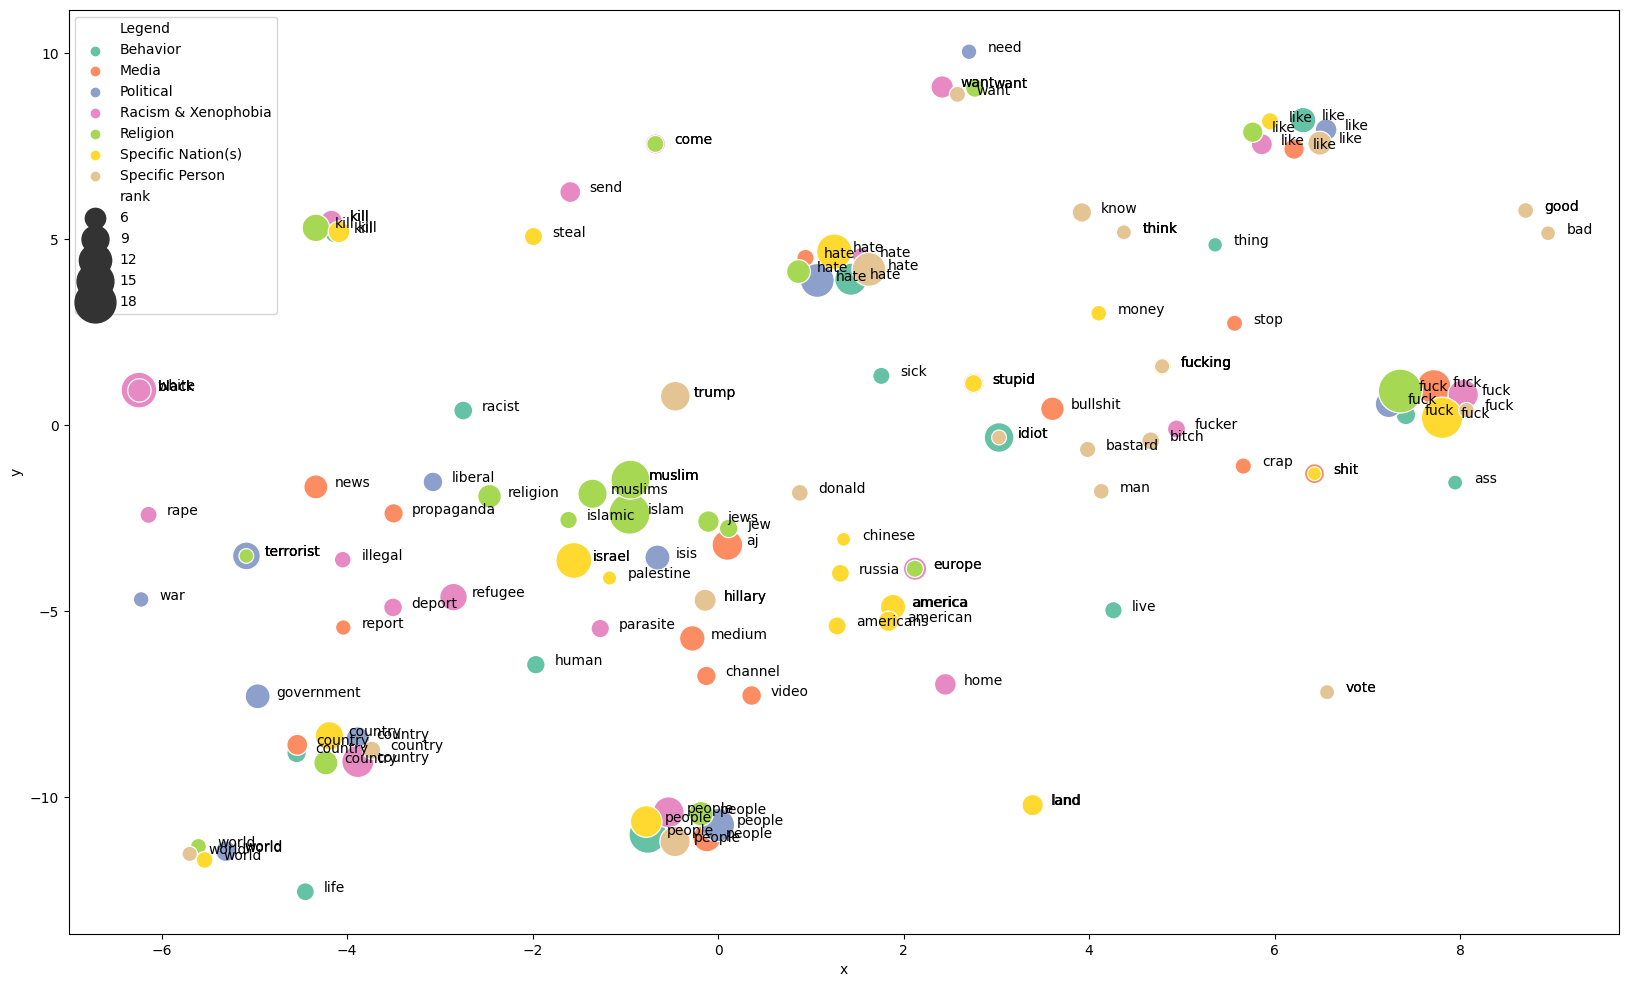

Class


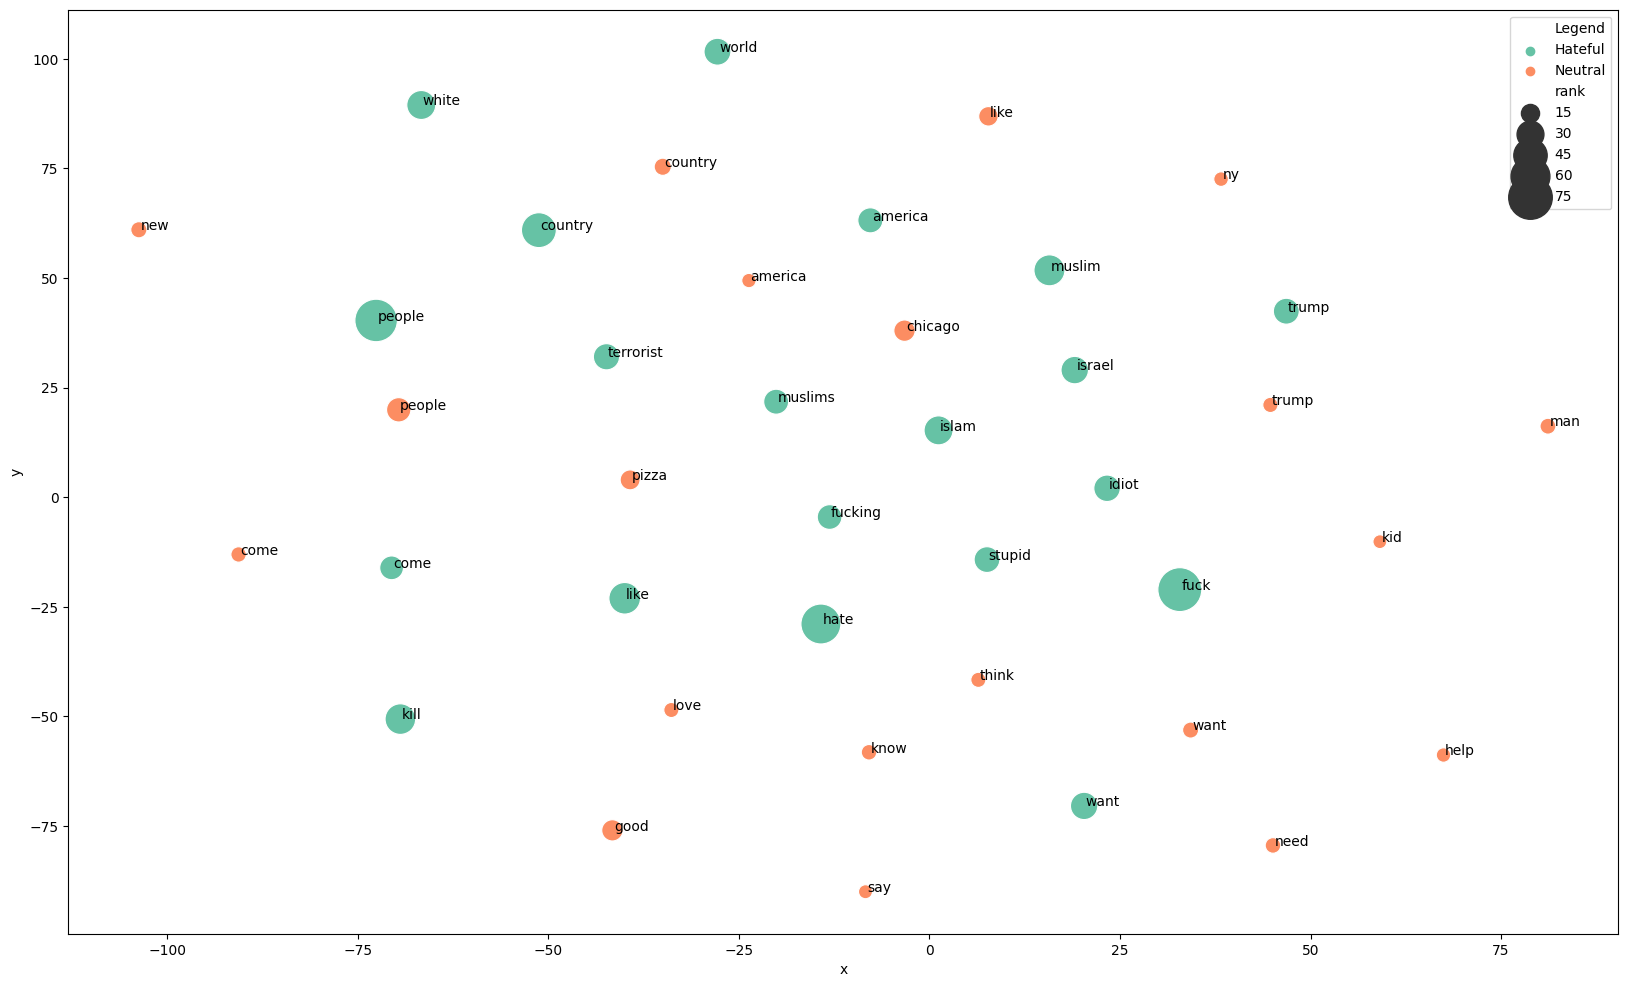

In [28]:

def tsne_plot_word_similaity_by_legend(df, token_column, rank_column, Legend):
    """
    Creates and TSNE model and plots it
    Parameters:
        df (DataFrame): DataFrame containing the word vectors and words
        category (str): Category to plot
    Returns:
        None
      """
    print(Legend)
    words = []
    vectors = []
    legend = []
    rank = []
    #print(df[token_column])
    for index, row in df.iterrows():
      #print(row[token_column])
      doc = row[token_column]
      #for j in range(len(doc)):
      word = doc#[j]
      words.append(word)
      vectors.append(nlp(word).vector)
      legend.append(row[Legend])
      rank.append(row[rank_column])

    tsne_array = TSNE(n_components=2, learning_rate=200, init='random')
    reduced_vectors = tsne_array.fit_transform(np.asarray(vectors)) # Create TSNE model and fit according to the new  vectors (From 300 to 2 dimensions)

    cur_x = [x[0] for x in reduced_vectors] # x-coord
    cur_y = [x[1] for x in reduced_vectors] # y-coord

    # Constructing the DataFrame
    cluster = pd.DataFrame({
       "x": [x[0] for x in reduced_vectors],
       "y": [x[1] for x in reduced_vectors],
       "word": words,
       "Legend": legend,
       "rank": rank
    })

   # Plotting

    plt.figure(figsize=(20, 12))
    sns.scatterplot(x="x", y="y", data=cluster, hue="Legend", size='rank', legend='auto', palette="Set2", sizes=(100, 1000))

    for line in range(0,cluster.shape[0]):
      plt.text(cluster.x[line]+0.2, cluster.y[line], cluster.word[line], horizontalalignment='left', size='medium', color='black')


    plt.legend(loc='best')
    plt.show()

top_20_words_category = get_top_n_words_per_X(word_importance_per_category, 20, 'Category')
vector_df_category = vectorize_sentences(top_20_words_category, 'term')
tsne_plot_word_similaity_by_legend(vector_df_category[~vector_df_category['Category'].isin(['Neutral', 'Swearing', 'Accusations', 'Promoting Violence', 'Humiliation'])], 'term', 'rank', 'Category')

top_20_words_class = get_top_n_words_per_X(word_importance_per_class, 20, 'Class')
vector_df_class = vectorize_sentences(top_20_words_class, 'term')
tsne_plot_word_similaity_by_legend(vector_df_class, 'term', 'rank', 'Class')



# One v. Rest approach

1## Logistic Regression

In [ ]:
nlp = spacy.load("en_core_web_sm") # change to small model to reduce computation time


In [ ]:
error_score='raise'

In [32]:


# Note new vectorizer, instead of having the preprocessor here, a preprocessed column has been added to the dataset to be compatible with OvR
tfidf_vec = TfidfVectorizer()


# Grid Search

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import numpy as np

tfidf_vec = TfidfVectorizer()

def LogReg_exp(data, split, iterations, feature, neutral):
  if neutral == 0:
      data = data[data['Category'] != 'Neutral']
  else:
   data = ML_all_rows
  # else use the entire data as passed
  seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 99

  # Assuming tfidf_vec is previously defined.
  test, train, test_label,  train_label  = data_split(data, data[['ID', feature]], split, seed[0])

  # Assuming data_split is a predefined function

  LogReg_pipe = Pipeline([
      ('vect', tfidf_vec),
      ('clf', LogisticRegression(multi_class='ovr'))
  ])

  # Hyperparameters to tune
  params = {
      'clf__C': [0.01, 0.1, 1, 10, 100],
      'clf__penalty': ['l1', 'l2', 'elasticnet'],
      'clf__class_weight': ['balanced', None]
  }

  # Setting up GridSearchCV with the pipeline, parameters, and scoring of choice
  grid_search = GridSearchCV(LogReg_pipe, param_grid=params, scoring='f1_macro', cv=5, n_jobs=-1)

  grid_search.fit(train['message_cleaned'], train_label[feature])

  # Using the best estimator found by GridSearchCV
  best_model = grid_search.best_estimator_

  yhat_category = best_model.predict(test['message_cleaned'])

  print("Best Parameters: ", grid_search.best_params_)



# Sample call to the function
LogReg_exp(ML_all_rows, 0.3, 1, 'numeric_category', 1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/pytho

Best Parameters:  {'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2'}


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import numpy as np

tfidf_vec = TfidfVectorizer()

def LogReg_exp(data, split, iterations, feature, neutral):
  if neutral == 0:
      data = data[data['Category'] != 'Neutral']
  else:
   data = ML_all_rows
  # else use the entire data as passed
  seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 99

  # Assuming tfidf_vec is previously defined.
  test, train, test_label,  train_label = data_split(data, data[['ID', feature]], split, seed[0])

  # Assuming data_split is a predefined function

  LogReg_pipe = Pipeline([
      ('vect', tfidf_vec),
      ('clf', LogisticRegression(multi_class='ovr'))
  ])

  # Hyperparameters to tune
  params = {
      'clf__C': [0.01, 0.1, 1, 10, 100],
      'clf__penalty': ['l1', 'l2', 'elasticnet'],
      'clf__class_weight': ['balanced', None]
  }

  # Setting up GridSearchCV with the pipeline, parameters, and scoring of choice
  grid_search = GridSearchCV(LogReg_pipe, param_grid=params, scoring='f1_macro', cv=5, n_jobs=-1)

  grid_search.fit(train['message_cleaned'], train_label[feature])

  # Using the best estimator found by GridSearchCV
  best_model = grid_search.best_estimator_

  yhat_category = best_model.predict(test['message_cleaned'])

  print("Best Parameters: ", grid_search.best_params_)



# Sample call to the function
LogReg_exp(ML_all_rows, 0.3, 1, 'numeric_class', 1)

Best Parameters:  {'clf__C': 100, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/pytho

## CAtegories:
Best Parameters:  {'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2'}

## Class:
Best Parameters:  {'clf__C': 100, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2'}

In [109]:

split = 0.7
iterations = 1
feature = 'numeric_values'
neutral = 1


if neutral == 0:
   data = ML_all_rows[ML_all_rows['Category'] != 'Neutral']
else:
   data = ML_all_rows


while iterations > 0:
   seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 9999
   print(seed[0])
   test, train, test_label,  train_label = data_split(data, data[['ID', feature]], split, seed[0])

   LogReg_pipe = Pipeline([
               ('vect', tfidf_vec),
               ('clf', LogisticRegression(multi_class='ovr', class_weight='balanced', C=1, penalty = 'l2')),
                  ])
   ovr = OneVsRestClassifier(LogReg_pipe)
   #ovr = LogReg_pipe

   ovr.fit(train['message_cleaned'], train_label[feature])
   yhat_category = ovr.predict(test['message_cleaned'])
   yhat_category_probs = ovr.predict_proba(test['message_cleaned'])
   print(classification_report(test_label[feature], yhat_category))

   cm_category = confusion_matrix(test_label[feature], yhat_category)
   print(cm_category)
   iterations-=1

14
              precision    recall  f1-score   support

           1       0.42      0.46      0.44        84
           2       0.58      0.46      0.51        95
           3       0.42      0.29      0.35       102
           4       0.44      0.47      0.45        86
           5       0.54      0.60      0.56        99
           6       0.47      0.54      0.50        93
           7       0.27      0.24      0.25        96
           8       0.72      0.79      0.75       246

    accuracy                           0.53       901
   macro avg       0.48      0.48      0.48       901
weighted avg       0.52      0.53      0.52       901

[[ 39   6   6   7   5   3   7  11]
 [  3  44   3   4  13  10   7  11]
 [ 12   5  30   6   6   3  17  23]
 [ 10   2   4  40   7   9  11   3]
 [  4   4   2   9  59  10   7   4]
 [ 10   1   3   5   9  50   3  12]
 [  8  10  18  14   6   6  23  11]
 [  7   4   5   5   5  15  11 194]]


In [110]:
print(classification_report(test_label[feature], yhat_category, target_names=list(Categories_map)))

                     precision    recall  f1-score   support

           Behavior       0.42      0.46      0.44        84
              Media       0.58      0.46      0.51        95
    Specific Person       0.42      0.29      0.35       102
 Specific Nation(s)       0.44      0.47      0.45        86
           Religion       0.54      0.60      0.56        99
Racism & Xenophobia       0.47      0.54      0.50        93
          Political       0.27      0.24      0.25        96
            Neutral       0.72      0.79      0.75       246

           accuracy                           0.53       901
          macro avg       0.48      0.48      0.48       901
       weighted avg       0.52      0.53      0.52       901



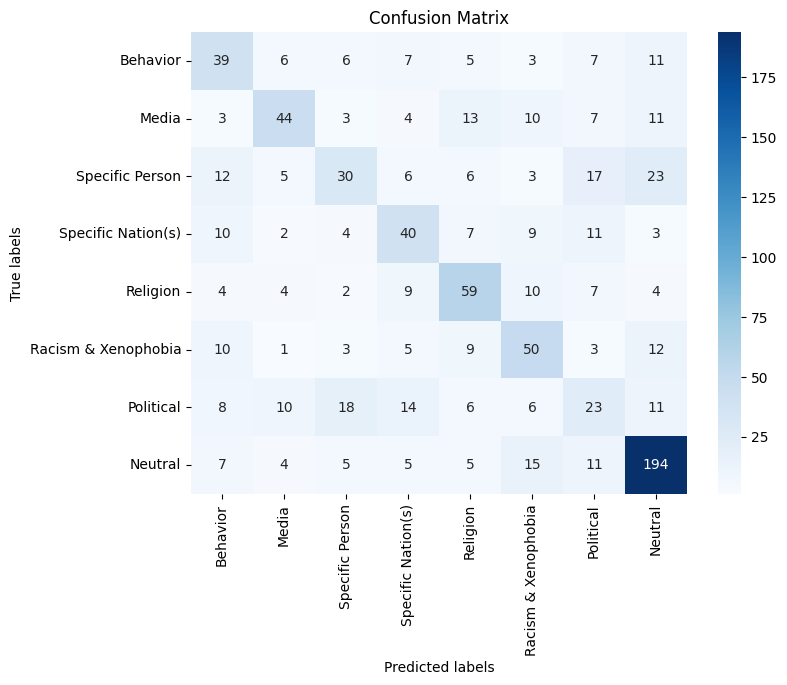

In [112]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_category, annot=True, fmt='g', cmap='Blues', xticklabels=list(Categories_map), yticklabels=list(Categories_map))

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [113]:
predictions = []
for model in ovr.estimators_:
  predictions.append(model.predict(test['message_cleaned']))

predictions_per_category = pd.DataFrame(test['ID'])

for cat in range(0, len(Categories_map)):
  predictions_per_category[f'{list(Categories_map)[cat]}'] = predictions[cat]
for col in predictions_per_category.columns:
  predictions_per_category[col] = predictions_per_category[col].apply(lambda x: col if x == 1 else x)

predictions_per_category.replace(0, np.nan, inplace=True)
max_len = predictions_per_category.apply(lambda row: row.dropna().shape[0], axis=1).max()
max_len

predictions_per_category_collapsed = predictions_per_category.apply(lambda row: pd.Series(row.dropna().values), axis=1)

predictions_per_category_collapsed = predictions_per_category_collapsed.reindex(columns=range(max_len))
#predictions_per_category_collapsed.sort_values(by='ID',ascending=True)
column_names = ['ID'] + ['Prediction_' + str(i-1) for i in range(2, predictions_per_category_collapsed.shape[1] + 1)]

predictions_per_category_collapsed.columns = column_names

predictions_per_category_collapsed = predictions_per_category_collapsed.drop_duplicates()
predictions_per_category_collapsed.sort_values(by='ID',ascending=True)

,ID,Prediction_1,Prediction_2,Prediction_3,Prediction_4
2803,93,Religion,NaN,NaN,NaN
3282,97,Specific Nation(s),Political,NaN,NaN
2129,129,Behavior,Specific Nation(s),Political,NaN
2130,130,Specific Person,Neutral,NaN,NaN
2807,132,Religion,Racism & Xenophobia,NaN,NaN
...,...,...,...,...,...
3049,346103,Specific Person,Racism & Xenophobia,NaN,NaN
1800,346264,Media,NaN,NaN,NaN
2128,346275,NaN,NaN,NaN,NaN
2850,346375,Behavior,NaN,NaN,NaN


In [114]:
# Create a helper column for counting occurrences of each ID
test_pivot = pd.DataFrame(test[['ID','Category']])
test_pivot['helper'] = test_pivot.groupby('ID').cumcount() + 1

# Pivot the table
test_pivot = test_pivot.pivot_table(index='ID', columns='helper', values='Category', aggfunc='first')

# Flatten the multi-level index and reset the column names
test_pivot.columns = [f'Actual_Label_{col}' for col in test_pivot.columns]
test_pivot.reset_index(inplace=True)

test_pivot = test_pivot.sort_values(by='ID',ascending=True)
test_pivot

test[['ID','Category']].sort_values(by='ID',ascending=True)

,ID,Category
2803,93,Religion
3282,97,Political
2129,129,Specific Person
2130,130,Specific Person
2807,132,Religion
...,...,...
1800,346264,Media
2128,346275,Specific Person
2850,346375,Religion
2257,346532,Specific Person


In [115]:

merged = test_pivot.merge(predictions_per_category_collapsed, on="ID")
cols_a = [col for col in merged.columns if 'Prediction' in col and col != 'ID']
cols_b = [col for col in merged.columns if 'Actual_Label' in col and col != 'ID']
print(cols_a)
print(cols_b)
def count_equal_values(row):
    i = 0
    for j in row[cols_a]:
       for k in row[cols_b]:
         if j == k:
          i += 1
    return i
merged['correct'] = merged.apply(count_equal_values, axis=1)
merged.sort_values(by='correct',ascending=True)
#.sum(axis=1)
#total_equal_values = (merged[cols_a].values == merged[cols_b].values).sum()
#total_equal_values
#merged.sort_values(by='ID',ascending=True)

['Prediction_1', 'Prediction_2', 'Prediction_3', 'Prediction_4']
['Actual_Label_1', 'Actual_Label_2', 'Actual_Label_3']


,ID,Actual_Label_1,Actual_Label_2,Actual_Label_3,Prediction_1,Prediction_2,Prediction_3,Prediction_4,correct
545,208586,Specific Nation(s),NaN,NaN,Political,NaN,NaN,NaN,0
243,46168,Racism & Xenophobia,NaN,NaN,Neutral,NaN,NaN,NaN,0
242,46081,Religion,NaN,NaN,Specific Nation(s),Political,NaN,NaN,0
444,140450,Behavior,NaN,NaN,Specific Nation(s),Neutral,NaN,NaN,0
612,249807,Behavior,NaN,NaN,Religion,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
578,220864,Racism & Xenophobia,Religion,NaN,Religion,Racism & Xenophobia,NaN,NaN,2
115,10317,Political,Specific Nation(s),NaN,Specific Nation(s),Political,NaN,NaN,2
224,42570,Media,Behavior,Media,Media,Political,NaN,NaN,2
748,281942,Specific Person,Political,NaN,Specific Person,Political,NaN,NaN,2


In [116]:
# #yhat_category_probs = ovr.predict_proba(test['message_cleaned'])
# correct = []
# for prediction in zip(yhat_category, test['Category']):
#   if list(Categories_map)[prediction[0]-1] == prediction[1]:
#    correct.append(1)
#   else:
#     correct.append(0)
# correct

# predictions = []
# for prediction in yhat_category:
#    predictions.append(list(Categories_map)[prediction-1])



probability_message = []
for message in zip(test['ID']
                   , test['message_cleaned']
                   , yhat_category_probs[:,0]
                   , yhat_category_probs[:,1]
                   , yhat_category_probs[:,2]
                   , yhat_category_probs[:,3]
                   , yhat_category_probs[:,4]
                   , yhat_category_probs[:,5]
                   , yhat_category_probs[:,6]
                   , yhat_category_probs[:,7]):
   probability_message.append(message)
df_probability = pd.DataFrame(probability_message, columns =['ID'
                                                            , 'message'
                                                            , 'Behavior'
                                                            , 'Media'
                                                            , 'Specific Person'
                                                            , 'Specific Nation(s)'
                                                            , 'Religion'
                                                            , 'Racism & Xenophobia'
                                                            , 'Political'
                                                            , 'Neutral']).sort_values(by='ID',ascending=True)
df_probability = df_probability.drop_duplicates()

prediction_evaluation = pd.merge(df_probability, merged, on='ID')

# prediction_evaluation = pd.merge(prediction_evaluation, test_pivot, on='ID')
prediction_evaluation

,ID,message,Behavior,Media,Specific Person,Specific Nation(s),Religion,Racism & Xenophobia,Political,Neutral,Actual_Label_1,Actual_Label_2,Actual_Label_3,Prediction_1,Prediction_2,Prediction_3,Prediction_4,correct
0,93,jews hitler damn right,0.081996,0.080919,0.162644,0.103532,0.294187,0.072407,0.110606,0.093710,Religion,NaN,NaN,Religion,NaN,NaN,NaN,1
1,97,like israel palestinian,0.032091,0.124793,0.071226,0.300086,0.130472,0.074182,0.194917,0.072233,Political,NaN,NaN,Specific Nation(s),Political,NaN,NaN,1
2,129,american stand suckenberg hawaiin people,0.231159,0.040085,0.076283,0.202349,0.027753,0.050654,0.218756,0.152962,Specific Person,NaN,NaN,Behavior,Specific Nation(s),Political,NaN,0
3,130,suckenberg respect common man disgusting ban h...,0.111821,0.078931,0.213776,0.133846,0.056747,0.082198,0.080286,0.242395,Specific Person,NaN,NaN,Specific Person,Neutral,NaN,NaN,1
4,132,zuck white jewish,0.031668,0.105918,0.081493,0.077121,0.254743,0.330032,0.031860,0.087165,Religion,NaN,NaN,Religion,Racism & Xenophobia,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,346103,animal like belong civilized europe,0.145896,0.056610,0.249089,0.050584,0.132043,0.221333,0.047779,0.096667,Racism & Xenophobia,NaN,NaN,Specific Person,Racism & Xenophobia,NaN,NaN,1
863,346264,oh boy come oh fuck hate channel,0.089753,0.221615,0.147497,0.186266,0.098180,0.106421,0.106662,0.043607,Media,NaN,NaN,Media,NaN,NaN,NaN,1
864,346275,putin shit,0.134288,0.161909,0.161676,0.118241,0.084704,0.120748,0.115973,0.102463,Specific Person,NaN,NaN,NaN,NaN,NaN,NaN,0
865,346375,hate religious people blame devil make insulti...,0.285683,0.073042,0.164722,0.097319,0.089733,0.042935,0.138991,0.107576,Religion,NaN,NaN,Behavior,NaN,NaN,NaN,0


In [ ]:
import sklearn.metrics as skm

cm_category = skm.multilabel_confusion_matrix(test_label['numeric_values'], yhat_category)
print(cm_category)
for i in range(0, len(Categories_map)-1):
   accuracy = (cm_category[i][0][0] + cm_category[i][1][1]) / (cm_category[i][0][0] + cm_category[i][1][1] + cm_category[i][0][1] + cm_category[i][1][0])
   print(accuracy)

[[[507  48]
  [ 44  46]]

 [[530  41]
  [ 30  44]]

 [[490  73]
  [ 54  28]]

 [[518  34]
  [ 59  34]]

 [[502  43]
  [ 43  57]]

 [[486  51]
  [ 52  56]]

 [[491  56]
  [ 64  34]]]
0.8573643410852713
0.889922480620155
0.8031007751937984
0.8558139534883721
0.8666666666666667
0.8403100775193798
0.813953488372093


In [120]:

split = 0.7
iterations = 1
feature = 'numeric_class'
neutral = 1


if neutral == 0:
   data = ML_all_rows[ML_all_rows['Category'] != 'Neutral']
else:
   data = ML_all_rows


while iterations > 0:
   seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 9999
   print(seed[0])
   test, train, test_label,  train_label = data_split(data, data[['ID', feature]], split, seed[0])

   LogReg_pipe = Pipeline([
               ('vect', tfidf_vec),
               ('clf', LogisticRegression(multi_class='ovr', class_weight='balanced', C=100, penalty = 'l2')),
                  ])
   ovr = OneVsRestClassifier(LogReg_pipe)
   #ovr = LogReg_pipe

   ovr.fit(train['message_cleaned'], train_label[feature])
   yhat_class = ovr.predict(test['message_cleaned'])
   yhat_class_probs = ovr.predict_proba(test['message_cleaned'])
   print(classification_report(test_label[feature], yhat_class, target_names=['Hate', 'Neutral']))

   cm_class = confusion_matrix(test_label[feature], yhat_class)
   print(cm_class)
   iterations-=1

34
              precision    recall  f1-score   support

        Hate       0.91      0.91      0.91       630
     Neutral       0.79      0.78      0.79       271

    accuracy                           0.87       901
   macro avg       0.85      0.85      0.85       901
weighted avg       0.87      0.87      0.87       901

[[574  56]
 [ 59 212]]


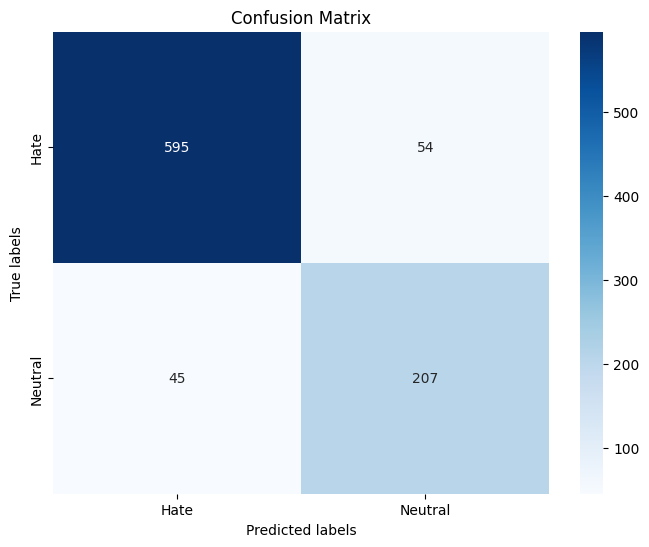

In [118]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_class, annot=True, fmt='g', cmap='Blues', xticklabels=['Hate', 'Neutral'], yticklabels=['Hate', 'Neutral'])

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [122]:
predictions = []
for model in ovr.estimators_:
  predictions.append(model.predict(test['message_cleaned']))
#print(predictions)
predictions_per_class = pd.DataFrame(test['ID'])

#for cl in range(0, len(Class_map)):

predictions_per_class[f'{list(Class_map)[0]}'] = predictions[0]
for col in predictions_per_class.columns:
   predictions_per_class[col] = predictions_per_class[col].apply(lambda x: col if x == 0 else x)
predictions_per_class
predictions_per_class['Hateful'] = predictions_per_class['Hateful'].replace(1, 'Neutral')
predictions_per_class.drop_duplicates()
# predictions_per_class.replace(0, np.nan, inplace=True)
# max_len = predictions_per_class.apply(lambda row: row.dropna().shape[0], axis=1).max()
# predictions_per_class

# predictions_per_class_collapsed = predictions_per_class.apply(lambda row: pd.Series(row.dropna().values), axis=1)

# predictions_per_class_collapsed = predictions_per_class_collapsed.reindex(columns=range(max_len))
#predictions_per_class_collapsed
#predictions_per_category_collapsed.sort_values(by='ID',ascending=True)
# column_names = ['ID'] + ['Prediction_' + str(i-1) for i in range(2, predictions_per_class_collapsed.shape[1] + 1)]

# predictions_per_class_collapsed.columns = column_names
# predictions_per_class_collapsed
# predictions_per_class_collapsed = predictions_per_class_collapsed.drop_duplicates()
# predictions_per_class_collapsed.sort_values(by='ID',ascending=True)
# predictions_per_class_collapsed['Prediction_1'] = predictions_per_class_collapsed['Prediction_1'].fillna('Neutral')

# # Create a helper column for counting occurrences of each ID
test_pivot = pd.DataFrame(test[['ID','Class']])
test_pivot.sort_values(by='ID',ascending=True)
test_pivot.drop_duplicates()
# test_pivot = test_pivot.rename(columns={'Class':'True_label'})

# #test_pivot['helper'] = test_pivot.groupby('ID').cumcount() + 1
# Create a helper column for counting occurrences of each ID
category_pivot = pd.DataFrame(test[['ID','Category']])
category_pivot['helper'] = category_pivot.groupby('ID').cumcount() + 1

# Pivot the table
category_pivot = category_pivot.pivot_table(index='ID', columns='helper', values='Category', aggfunc='first')

# Flatten the multi-level index and reset the column names
category_pivot.columns = [f'Actual_Label_{col}' for col in category_pivot.columns]
category_pivot.reset_index(inplace=True)

category_pivot = category_pivot.sort_values(by='ID',ascending=True)
category_pivot.drop_duplicates()

# # Pivot the table
# # test_pivot = test_pivot.pivot_table(index='ID', columns='helper', values='Class', aggfunc='first')

# # # Flatten the multi-level index and reset the column names
# # test_pivot.columns = [f'Actual_Label_{col}' for col in test_pivot.columns]
# # test_pivot.reset_index(inplace=True)

# # test_pivot = test_pivot.sort_values(by='ID',ascending=True)
# # test_pivot

# # test[['ID','Class']].sort_values(by='ID',ascending=True)

merged = test_pivot.merge(predictions_per_class, on="ID")
merged = merged.merge(category_pivot, on='ID')
# cols_a = [col for col in merged.columns if 'Prediction' in col and col != 'ID']
# cols_b = [col for col in merged.columns if 'Actual_Label' in col and col != 'ID']
# print(cols_a)
# print(cols_b)

# # def count_equal_values(row):
# #     i = 0
# #     for j in row[cols_a]:
# #        print(j)

# #       #  for k in row[cols_b]:
# #       #    print(j, '   ', k)
# #     return i
merged['Correct'] = (merged['Class'] == merged['Hateful']).astype(int)
# merged
# merged['correct'] = merged.apply(count_equal_values, axis=1)
# merged.sort_values(by='correct',ascending=True)
#merged
probability_message = []
for message in zip(test['ID']
                   , test['message_cleaned']
                   , yhat_class_probs[:,0]
                   , yhat_class_probs[:,1]):
   probability_message.append(message)
df_probability = pd.DataFrame(probability_message, columns =['ID'
                                                            , 'message'
                                                            , 'Hate'
                                                            , 'Neutral']).sort_values(by='ID',ascending=True)
df_probability.drop_duplicates()

prediction_evaluation = pd.merge(df_probability, merged, on='ID')

prediction_evaluation = prediction_evaluation.drop_duplicates()

prediction_evaluation

,ID,message,Hate,Neutral,Class,Hateful,Actual_Label_1,Actual_Label_2,Actual_Label_3,Correct
0,132,zuck white jewish,0.994554,0.005446,Hateful,Hateful,Religion,NaN,NaN,1
1,140,mark piece garbage,0.987825,0.012175,Hateful,Hateful,Specific Person,NaN,NaN,1
2,145,smug self righteous european invader murderer ...,0.955001,0.044999,Hateful,Hateful,Specific Nation(s),NaN,NaN,1
3,154,nah big deal jews love love take land force,0.017619,0.982381,Hateful,Neutral,Religion,NaN,NaN,0
4,164,self worship pig need meet fine gentleman hitler,0.898188,0.101812,Hateful,Hateful,Specific Person,Religion,NaN,1
...,...,...,...,...,...,...,...,...,...,...
1094,346210,hillarious support isis terrorism surprise unl...,0.957541,0.042459,Hateful,Hateful,Media,NaN,NaN,1
1095,346266,bullshit,0.999984,0.000016,Hateful,Hateful,Media,NaN,NaN,1
1096,346275,putin shit,0.871158,0.128842,Hateful,Hateful,Specific Person,NaN,NaN,1
1097,346375,hate religious people blame devil make insulti...,0.979480,0.020520,Hateful,Hateful,Behavior,NaN,NaN,1


In [159]:
FN = prediction_evaluation[(prediction_evaluation['Class'] == 'Hateful') & (prediction_evaluation['Correct'] == 0)]
TP = prediction_evaluation[(prediction_evaluation['Class'] == 'Hateful') & (prediction_evaluation['Correct'] == 1)]

# Count occurrences of each unique value
FN_category = pd.concat([FN[col] for col in FN.columns if 'Actual' in col])
FN_category_counts = FN_category.value_counts()

TP_category = pd.concat([TP[col] for col in TP.columns if 'Actual' in col])
TP_category_counts = TP_category.value_counts()

FN_category_counts = pd.DataFrame(FN_category_counts, columns=['Nr_of_FN'])
TP_category_counts = pd.DataFrame(TP_category_counts, columns=['Nr_of_TP'])


FN_category_counts
TP_category_counts


,Nr_of_TP
Religion,98
Political,87
Behavior,84
Specific Nation(s),82
Media,78
Specific Person,74
Racism & Xenophobia,71


In [ ]:
from sklearn.metrics import hamming_loss
hamming_loss(test_label['numeric_values'], yhat_category)

0.517829457364341

# COEFFS for Logistic Regression

In [ ]:
#Get feature importance
for i in range(0, len(ovr.estimators_)):
    tfidf_mapping = ovr.estimators_[i].get_params()['vect'].vocabulary_
    tfidf_map = [(x, tfidf_mapping[x]) for x in tfidf_mapping]
    intercept = ovr.estimators_[i].named_steps['clf'].intercept_[0]
    coeffs = ovr.estimators_[i].named_steps['clf'].coef_[0]
    words = []
    for j in zip(tfidf_map):
        words.append(j[0][0])
        feat_list = []
        total_importance = 0
        # Make a dataframe of Coefficients and Feature Names
    category = list(Categories_map)[i]
    for feature in zip(words, coeffs):
        feat_list.append(feature)
        total_importance += feature[1]
#        category += feature[2]
    # create DataFrame using data
    df_imp = pd.DataFrame(feat_list, columns =['FEATURE', f'{category}'])#.sort_values(by='IMPORTANCE',
    if i == 0:
        coeff_importance = pd.DataFrame(feat_list, columns =['FEATURE', f'{category}']).sort_values(by='FEATURE', ascending=True)
    else:
        coeff_importance[f'{category}'] = df_imp[f'{category}']
    #df_imp.sort_values(by='Category', ascending=False)
print(coeff_importance)

                    FEATURE  Behavior     Media  Specific Person  \
21634             aaaanyway -0.002885 -0.002924        -0.002988   
21645        aaaanyway know -0.006327 -0.005907         0.034103   
13717               aamirah  0.046368 -0.004169         0.003247   
13721          aamirah sure -0.005734 -0.005567         0.031924   
12760               abandon -0.006447 -0.005619        -0.005945   
...                     ...       ...       ...              ...   
19300     zuckerberg jewish -0.005580 -0.005464        -0.005842   
26438      zuckerberg wrong -0.006283 -0.006178        -0.006652   
12749            zuckerburg -0.003799 -0.003878         0.020599   
26862  zuckerburg corporate -0.004316  0.025770        -0.004321   
12753        zuckerburg way -0.004611  0.028711        -0.004719   

       Specific Nation(s)  Religion  Racism & Xenophobia  Political  
21634           -0.002786 -0.002682            -0.002872   0.017279  
21645           -0.006100 -0.005702        

In [ ]:

split = 0.3
iterations = 1
feature = 'numeric_class'
neutral = 1


if neutral == 0:
   data = ML_all_rows[ML_all_rows['Category'] != 'Neutral']
else:
   data = ML_all_rows


while iterations > 0:
   seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 9999
   print(seed[0])
   train, test, train_label, test_label  = data_split(data, data[['ID', feature]], split, seed[0])

   LogReg_pipe = Pipeline([
               ('vect', tfidf_vec),
               ('clf', LogisticRegression(multi_class='ovr', class_weight='balanced', C=1, penalty = 'l2')),
                  ])
   #ovr = OneVsRestClassifier(LogReg_pipe)
   # ovr = LogReg_pipe

   LogReg_pipe.fit(train['message_cleaned'], train_label[feature])
   yhat_class = LogReg_pipe.predict(test['message_cleaned'])
   yhat_class_probs = LogReg_pipe.predict_proba(test['message_cleaned'])
   print(classification_report(test_label[feature], yhat_class))

   cm_category = confusion_matrix(test_label[feature], yhat_class)
   print(cm_category)
   iterations-=1

40
              precision    recall  f1-score   support

           1       0.91      0.91      0.91       647
           2       0.76      0.78      0.77       255

    accuracy                           0.87       902
   macro avg       0.84      0.84      0.84       902
weighted avg       0.87      0.87      0.87       902

[[586  61]
 [ 57 198]]


In [ ]:
dt_matrix = tfidf_vec.fit_transform(train['message_cleaned'])
tfidf_sum = dt_matrix.sum(axis = 0)
tfidf_sum = np.transpose(tfidf_sum).tolist()
tfidf_sum = [e[0] for e in tfidf_sum]


#Get feature importance
tfidf_mapping = LogReg_pipe.get_params()['vect'].vocabulary_
tfidf_map = [(x, tfidf_mapping[x]) for x in tfidf_mapping]
intercept = LogReg_pipe.named_steps['clf'].intercept_[0]
coeffs = LogReg_pipe.named_steps['clf'].coef_[0]
# hate = yhat_category_probs[:, 0]
# neutral = yhat_category_probs[:, 1]
words = []
for j in zip(tfidf_map):
   words.append(j[0][0])
feat_list = []
total_importance = 0
   # Make a dataframe of Coefficients and Feature Names
#category = list(Categories_map)[i]
for feature in zip(words, coeffs):
   feat_list.append(feature)
   total_importance += feature[1]
#        category += feature[2]
# create DataFrame using data
df_imp = pd.DataFrame(feat_list, columns =['FEATURE', 'Coeff']).sort_values(by='Coeff',ascending=True)
# if i == 0:
#    coeff_importance = pd.DataFrame(feat_list, columns =['FEATURE', f'{category}']).sort_values(by='FEATURE', ascending=True)
# else:
#df_imp.sort_values(by='Category', ascending=False)
print(df_imp)

                 FEATURE     Coeff
11176     global failure -3.990523
13093     later possible -3.719180
16568        isis behead -2.618422
14528          love club -2.586905
29880                 es -2.243061
...                  ...       ...
12085     mass murdering  1.441658
18668  trouble ferociuos  1.552749
21464    brutality leave  1.741295
23396          dog india  2.312494
4791            muslimic  2.460758

[35266 rows x 2 columns]


In [ ]:

probability_message = []
for message in zip(test['ID'], test['message_cleaned'], yhat_category_probs[:,0], yhat_category_probs[:,1]):
   probability_message.append(message)
df_probability = pd.DataFrame(probability_message, columns =['ID', 'message', 'hate', 'neutral']).sort_values(by='ID',ascending=True)
df_probability


,ID,message,hate,neutral
139,129,american stand suckenberg hawaiin people,0.252206,0.091988
127,131,jew piece shit steal idea facebook sell user g...,0.207921,0.118756
491,171,mark priscilla selfish people sleep night cons...,0.158631,0.156980
607,181,burn,0.121764,0.099908
328,191,piece shit white devil,0.112862,0.182732
...,...,...,...,...
0,345833,fuck aj blame africa spread virus start brasil,0.114441,0.105154
61,346069,hate religion kill alot people christians espe...,0.157669,0.098530
601,346072,news pro islam pro turn europe muslim shit hol...,0.156305,0.137365
399,346275,putin shit,0.116382,0.163311


## Support Vector Machine

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
import numpy as np

def SVC_exp(data, split, iterations, feature, neutral):
  if neutral == 0:
      data = data[data['Category'] != 'Neutral']
  else:
   data = ML_all_rows
  # else use the entire data as passed
  seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 99

  # Assuming tfidf_vec is previously defined.
  train, test, train_label, test_label  = data_split(data, data[['ID', feature]], split, seed[0])

  # Assuming data_split is a predefined function

  SVC_pipe = Pipeline([
                  ('vect', tfidf_vec),
                  ('clf', LinearSVC(multi_class='ovr')),
                      ])
  # Define the hyperparameters for Linear SVM
  params = {
      'clf__C': [0.001, 0.01, 0.1, 1, 10],
      'clf__loss': ['hinge', 'squared_hinge'],
      'clf__penalty': ['l1', 'l2'],
      'clf__dual': [True, False]
  }

  # ovr = OneVsRestClassifier(SVC_pipe)

  # Setting up GridSearchCV with the pipeline, parameters, and scoring of choice
  grid_search = GridSearchCV(SVC_pipe, param_grid=params, scoring='f1_macro', cv=5, n_jobs=-1, verbose=1)

  grid_search.fit(train['message_cleaned'], train_label[feature])

  # Using the best estimator found by GridSearchCV
  best_model = grid_search.best_estimator_

  yhat_category = best_model.predict(test['message_cleaned'])

  # print(classification_report(test_label, yhat_category))
  # cm_category = confusion_matrix(test_label, yhat_category)
  # print(cm_category)

  print("Best Parameters: ", grid_search.best_params_)



# Sample call to the function
SVC_exp(ML_all_rows, 0.3, 1, 'numeric_values', 0)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters:  {'clf__C': 0.1, 'clf__dual': True, 'clf__loss': 'squared_hinge', 'clf__penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/pytho

##Category:
Best Parameters:  {'clf__C': 1, 'clf__dual': False, 'clf__loss': 'squared_hinge', 'clf__penalty': 'l1'}

##Class
Best Parameters:  {'clf__C': 10, 'clf__dual': False, 'clf__loss': 'squared_hinge', 'clf__penalty': 'l1'}


# **Code below is not used and should be disregarded **





## Linear Support Vector Machines

In [ ]:
def SVC_Lin_exp(data, split, iterations, feature, neutral):

   if neutral == 0:
      data = ML_all_rows[ML_all_rows['Category'] != 'Neutral']
   else:
      data = ML_all_rows


   while iterations > 0:
      seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 9999
      print(seed[0])
      train, test, train_label, test_label  = data_split(data, data[['ID', feature]], split, seed[0])

      SVC_Lin_pipe = Pipeline([
                  ('vect', tfidf_vec),
                  ('clf', LinearSVC(C = 1, dual = False, loss = 'squared_hinge', penalty = 'l1')),
                     ])



      SVC_Lin_pipe.fit(train['message'], train_label[feature])
      yhat_category = SVC_Lin_pipe.predict(test['message'])
      print(classification_report(test_label[feature], yhat_category))
      cm_category = confusion_matrix(test_label[feature], yhat_category)
      print(cm_category)
      iterations-=1
SVC_Lin_exp(ML_all_rows, 0.3, 2, 'numeric_class', 1)

47
              precision    recall  f1-score   support

           1       0.90      0.92      0.91       634
           2       0.79      0.75      0.77       268

    accuracy                           0.87       902
   macro avg       0.84      0.83      0.84       902
weighted avg       0.87      0.87      0.87       902

[[581  53]
 [ 67 201]]
42
              precision    recall  f1-score   support

           1       0.88      0.92      0.90       631
           2       0.80      0.72      0.75       271

    accuracy                           0.86       902
   macro avg       0.84      0.82      0.83       902
weighted avg       0.86      0.86      0.86       902

[[582  49]
 [ 77 194]]


## Decision Trees

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
import numpy as np

def DT_exp(data, split, iterations, feature, neutral):
  if neutral == 0:
      data = data[data['Category'] != 'Neutral']
  else:
   data = ML_all_rows
  # else use the entire data as passed
  seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 99

  # Assuming tfidf_vec is previously defined.
  train, test, train_label, test_label  = data_split(data, data[['ID', feature]], split, seed[0])

  # Assuming data_split is a predefined function

  DT_pipe = Pipeline([
                  ('vect', tfidf_vec),
                  ('clf', DecisionTreeClassifier())
                  ])
  # Define hyperparameters grid
  params = {
      'clf__criterion': ['gini', 'entropy'],
      'clf__splitter': ['best', 'random'],
      'clf__max_depth': [None, 10, 20, 30, 40, 50],
      'clf__min_samples_split': [2, 5, 10],
      'clf__min_samples_leaf': [1, 2, 4]
  }


  # Setting up GridSearchCV with the pipeline, parameters, and scoring of choice
  grid_search = GridSearchCV(DT_pipe, params, cv=5, n_jobs=-1, verbose=1)

  grid_search.fit(train['message_cleaned'], train_label[feature])

  # Using the best estimator found by GridSearchCV
  best_model = grid_search.best_estimator_

  yhat_category = best_model.predict(test['message_cleaned'])

  # print(classification_report(test_label, yhat_category))
  # cm_category = confusion_matrix(test_label, yhat_category)
  # print(cm_category)

  print("Best Parameters: ", grid_search.best_params_)



# Sample call to the function
DT_exp(ML_all_rows, 0.3, 1, 'numeric_class', 1)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters:  {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'clf__splitter': 'random'}


##Category
Best Parameters:  {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'clf__splitter': 'random'}


## Class
Best Parameters:  {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__splitter': 'random'}


In [ ]:


def DT_pipe_exp(data, split, iterations, feature, neutral):

   if neutral == 0:
      data = ML_all_rows[ML_all_rows['Category'] != 'Neutral']
   else:
      data = ML_all_rows


   while iterations > 0:
      seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 9999
      print(seed[0])
      train, test, train_label, test_label  = data_split(data, data[['ID', feature]], split, seed[0])

      DT_pipe = Pipeline([
                  ('vect', tfidf_vec),
                  ('clf', DecisionTreeClassifier(criterion = 'entropy', max_depth = None, min_samples_leaf=1, min_samples_split = 10, splitter = 'random')),
                     ])



      DT_pipe.fit(train['message'], train_label[feature])
      yhat_category = DT_pipe.predict(test['message'])
      print(classification_report(test_label[feature], yhat_category))
      cm_category = confusion_matrix(test_label[feature], yhat_category)
      print(cm_category)
      iterations-=1
DT_pipe_exp(ML_all_rows, 0.3, 2, 'numeric_class', 1)


69
              precision    recall  f1-score   support

           1       0.89      0.89      0.89       627
           2       0.74      0.75      0.75       275

    accuracy                           0.85       902
   macro avg       0.82      0.82      0.82       902
weighted avg       0.85      0.85      0.85       902

[[556  71]
 [ 68 207]]
49
              precision    recall  f1-score   support

           1       0.88      0.90      0.89       634
           2       0.74      0.70      0.72       268

    accuracy                           0.84       902
   macro avg       0.81      0.80      0.80       902
weighted avg       0.84      0.84      0.84       902

[[568  66]
 [ 80 188]]


In [ ]:

# accuracies = [accuracy_score(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]

# for idx, acc in enumerate(accuracies, 1):
#     print(f"Label {idx} Accuracy: {acc:.4f}")

## Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
import numpy as np

def RF_exp(data, split, iterations, feature, neutral):
  if neutral == 0:
      data = data[data['Category'] != 'Neutral']
  else:
   data = ML_all_rows
  # else use the entire data as passed
  seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 99

  # Assuming tfidf_vec is previously defined.
  train, test, train_label, test_label  = data_split(data, data[['ID', feature]], split, seed[0])

  # Assuming data_split is a predefined function

  RF_pipe = Pipeline([
                  ('vect', tfidf_vec),
                  ('clf', RandomForestClassifier())
                  ])
  # Define hyperparameters grid
  params = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_features': ['auto', 'sqrt'],
    'clf__max_depth': [10, 20, 30, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__bootstrap': [True, False]
  }


  # Setting up GridSearchCV with the pipeline, parameters, and scoring of choice
  grid_search = GridSearchCV(RF_pipe, params, cv=5, n_jobs=-1, verbose=1)

  grid_search.fit(train['message_cleaned'], train_label[feature])

  # Using the best estimator found by GridSearchCV
  best_model = grid_search.best_estimator_

  yhat_category = best_model.predict(test['message_cleaned'])

  # print(classification_report(test_label, yhat_category))
  # cm_category = confusion_matrix(test_label, yhat_category)
  # print(cm_category)

  print("Best Parameters: ", grid_search.best_params_)



# Sample call to the function
RF_exp(ML_all_rows, 0.3, 1, 'numeric_values', 0)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
710 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/py

Best Parameters:  {'clf__bootstrap': False, 'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}


##Category
Best Parameters:  {'clf__bootstrap': False, 'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}



##Class
Best Parameters:  {'clf__bootstrap': False, 'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}



In [ ]:
def RF_pipe_exp(data, split, iterations, feature, neutral):

   if neutral == 0:
      data = ML_all_rows[ML_all_rows['Category'] != 'Neutral']
   else:
      data = ML_all_rows


   while iterations > 0:
      seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 9999
      print(seed[0])
      train, test, train_label, test_label  = data_split(data, data[['ID', feature]], split, seed[0])

      RF_pipe = Pipeline([
                  ('vect', tfidf_vec),
                  ('clf', RandomForestClassifier(bootstrap= False
                                                 , max_depth= None
                                                 , max_features= 'sqrt'
                                                 , min_samples_leaf= 1
                                                 , min_samples_split= 5
                                                 , n_estimators = 200))
                     ])

      RF_pipe.fit(train['message'], train_label[feature])
      yhat_category = RF_pipe.predict(test['message'])
      print(classification_report(test_label[feature], yhat_category))
      cm_category = confusion_matrix(test_label[feature], yhat_category)
      print(cm_category)
      iterations-=1
RF_pipe_exp(ML_all_rows, 0.3, 1, 'numeric_values', 0)

55
              precision    recall  f1-score   support

           1       0.45      0.49      0.47        79
           2       0.78      0.76      0.77        98
           3       0.36      0.39      0.38        89
           4       0.51      0.43      0.47        90
           5       0.58      0.60      0.59        95
           6       0.44      0.60      0.51        94
           7       0.38      0.24      0.29       100

    accuracy                           0.50       645
   macro avg       0.50      0.50      0.50       645
weighted avg       0.50      0.50      0.50       645

[[39  1 13  7  2 12  5]
 [10 74  1  3  5  3  2]
 [ 9  4 35  2  8 18 13]
 [ 7  1  6 39 12 15 10]
 [ 3  5  8  6 57 12  4]
 [10  4  3  9  6 56  6]
 [ 9  6 30 11  9 11 24]]


## Random Forest 2nd attempt

In [ ]:
def RF_pipe_exp(data, split, iterations, feature, neutral):

   if neutral == 0:
      data = ML_all_rows[ML_all_rows['Category'] != 'Neutral']
   else:
      data = ML_all_rows


   while iterations > 0:
      seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 9999
      print(seed[0])
      train, test, train_label, test_label  = data_split(data, data[['ID', feature]], split, seed[0])

      RF_pipe = Pipeline([
                  ('vect', tfidf_vec),
                  ('clf', RandomForestClassifier()),
                     ])
      #ovr = OneVsRestClassifier(RF_pipe)


      ovr.fit(train['message'], train_label['numeric_values'])
      yhat_category = ovr.predict(test['message'])
      print(classification_report(test_label['numeric_values'], yhat_category))
      cm_category = confusion_matrix(test_label['numeric_values'], yhat_category)
      print(cm_category)
      iterations-=1
RF_pipe_exp(ML_all_rows, 0.3, 1, 'numeric_values', 0)

2


c:\Users\unoos\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\unoos\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\unoos\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\unoos\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\unoos\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\unoos\miniconda3\lib\site-packa

              precision    recall  f1-score   support

           1       0.43      0.60      0.51        81
           2       0.61      0.55      0.58        93
           3       0.35      0.33      0.34        99
           4       0.41      0.48      0.44        83
           5       0.54      0.55      0.54        86
           6       0.59      0.52      0.55       103
           7       0.31      0.24      0.27       100

    accuracy                           0.46       645
   macro avg       0.46      0.47      0.46       645
weighted avg       0.46      0.46      0.46       645

[[49  3  9  8  2  5  5]
 [ 6 51  4  7 11  4 10]
 [23  6 33 11  8  4 14]
 [ 7  2  6 40  5  9 14]
 [ 4  5  6 10 47 12  2]
 [10  8  7  9  6 54  9]
 [14  9 28 13  8  4 24]]


## Random Forest with GridSearch

In [ ]:
nlp = spacy.load("en_core_web_sm",disable=['parser','ner']) # Define the language model we want to use


In [ ]:
def RF_pipe_exp(data, split, iterations, feature, neutral):

   if neutral == 0:
      data = ML_all_rows[ML_all_rows['Category'] != 'Neutral']
   else:
      data = ML_all_rows


   while iterations > 0:
      seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 9999
      print(seed[0])
      train, test, train_label, test_label  = data_split(data, data[['ID', feature]], split, seed[0])
      #test_label[feature] = test_label[feature].replace(2, 0)
      #train_label[feature] = train_label[feature].replace(2, 0)

      RF_pipe = Pipeline([
                  ('vect', tfidf_vec),
                  ('clf', RandomForestClassifier()),
                     ])
      ovr = OneVsRestClassifier(RF_pipe)
      params = {
         'estimator__clf__n_estimators': [10, 50],
         #'max_depth': [10, 20]
         # 'n_estimators': [10, 50, 100],
         # 'max_depth': [ 10, 20, 30],
         # 'min_samples_split': [2, 5],
         # 'min_samples_leaf': [2, 4],
         # 'max_features': ['auto', 'sqrt', 'log2'],
         # 'clf__bootstrap': [True, False]
      }
      grid_search = GridSearchCV(ovr, param_grid=params, cv=3, verbose=1, n_jobs=-1)
      #print("Best Parameters:", grid_search.best_params_)
      # Split the data and labels
      train = train.copy()
      test = test.copy()
      train_label = train_label.copy()
      test_label = test_label.copy()

      grid_search.fit(train['message'], train_label[feature])
      best_model = grid_search.best_estimator_

    # Evaluate on your test set or any other metrics you're interested in here
      yhat_category = best_model.predict(test['message'])
      #yhat_category = ovr.predict(test['message'])
      print(classification_report(test_label[feature], yhat_category))
      cm_category = confusion_matrix(test_label[feature], yhat_category)
      print(cm_category)
      return(best_RF_model)
      iterations-=1
RF_model = RF_pipe_exp(ML_all_rows, 0.3, 1, 'numeric_class', 1)

3
Fitting 3 folds for each of 2 candidates, totalling 6 fits


ValueError: 
All the 6 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\unoos\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\unoos\miniconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\unoos\miniconda3\lib\site-packages\sklearn\multiclass.py", line 339, in fit
    self.estimators_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose)(
  File "c:\Users\unoos\miniconda3\lib\site-packages\sklearn\utils\parallel.py", line 65, in __call__
    return super().__call__(iterable_with_config)
  File "c:\Users\unoos\miniconda3\lib\site-packages\joblib\parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "c:\Users\unoos\miniconda3\lib\site-packages\joblib\parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  File "c:\Users\unoos\miniconda3\lib\site-packages\sklearn\utils\parallel.py", line 127, in __call__
    return self.function(*args, **kwargs)
  File "c:\Users\unoos\miniconda3\lib\site-packages\sklearn\multiclass.py", line 90, in _fit_binary
    estimator.fit(X, y)
  File "c:\Users\unoos\miniconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\unoos\miniconda3\lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\unoos\miniconda3\lib\site-packages\sklearn\pipeline.py", line 370, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\unoos\miniconda3\lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "c:\Users\unoos\miniconda3\lib\site-packages\sklearn\pipeline.py", line 950, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "c:\Users\unoos\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py", line 2126, in fit_transform
    X = super().fit_transform(raw_documents)
  File "c:\Users\unoos\miniconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\unoos\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py", line 1383, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "c:\Users\unoos\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py", line 1270, in _count_vocab
    for feature in analyze(doc):
  File "c:\Users\unoos\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py", line 112, in _analyze
    doc = tokenizer(doc)
  File "C:\Users\unoos\AppData\Local\Temp/ipykernel_23952/888369003.py", line 15, in preprocess
  File "c:\Users\unoos\miniconda3\lib\site-packages\spacy\language.py", line 1047, in __call__
    error_handler(name, proc, [doc], e)
  File "c:\Users\unoos\miniconda3\lib\site-packages\spacy\util.py", line 1724, in raise_error
    raise e
  File "c:\Users\unoos\miniconda3\lib\site-packages\spacy\language.py", line 1042, in __call__
    doc = proc(doc, **component_cfg.get(name, {}))  # type: ignore[call-arg]
  File "spacy\pipeline\trainable_pipe.pyx", line 56, in spacy.pipeline.trainable_pipe.TrainablePipe.__call__
  File "c:\Users\unoos\miniconda3\lib\site-packages\spacy\util.py", line 1724, in raise_error
    raise e
  File "spacy\pipeline\trainable_pipe.pyx", line 52, in spacy.pipeline.trainable_pipe.TrainablePipe.__call__
  File "c:\Users\unoos\miniconda3\lib\site-packages\spacy\pipeline\tok2vec.py", line 126, in predict
    tokvecs = self.model.predict(docs)
  File "c:\Users\unoos\miniconda3\lib\site-packages\thinc\model.py", line 334, in predict
    return self._func(self, X, is_train=False)[0]
  File "c:\Users\unoos\miniconda3\lib\site-packages\thinc\layers\chain.py", line 54, in forward
    Y, inc_layer_grad = layer(X, is_train=is_train)
  File "c:\Users\unoos\miniconda3\lib\site-packages\thinc\model.py", line 310, in __call__
    return self._func(self, X, is_train=is_train)
  File "c:\Users\unoos\miniconda3\lib\site-packages\thinc\layers\chain.py", line 54, in forward
    Y, inc_layer_grad = layer(X, is_train=is_train)
  File "c:\Users\unoos\miniconda3\lib\site-packages\thinc\model.py", line 310, in __call__
    return self._func(self, X, is_train=is_train)
  File "c:\Users\unoos\miniconda3\lib\site-packages\thinc\layers\with_array.py", line 36, in forward
    return cast(Tuple[SeqT, Callable], _ragged_forward(model, Xseq, is_train))
  File "c:\Users\unoos\miniconda3\lib\site-packages\thinc\layers\with_array.py", line 91, in _ragged_forward
    Y, get_dX = layer(Xr.dataXd, is_train)
  File "c:\Users\unoos\miniconda3\lib\site-packages\thinc\model.py", line 310, in __call__
    return self._func(self, X, is_train=is_train)
  File "c:\Users\unoos\miniconda3\lib\site-packages\thinc\layers\concatenate.py", line 57, in forward
    Ys, callbacks = zip(*[layer(X, is_train=is_train) for layer in model.layers])
  File "c:\Users\unoos\miniconda3\lib\site-packages\thinc\layers\concatenate.py", line 57, in <listcomp>
    Ys, callbacks = zip(*[layer(X, is_train=is_train) for layer in model.layers])
  File "c:\Users\unoos\miniconda3\lib\site-packages\thinc\model.py", line 310, in __call__
    return self._func(self, X, is_train=is_train)
  File "c:\Users\unoos\miniconda3\lib\site-packages\thinc\layers\chain.py", line 54, in forward
    Y, inc_layer_grad = layer(X, is_train=is_train)
  File "c:\Users\unoos\miniconda3\lib\site-packages\thinc\model.py", line 310, in __call__
    return self._func(self, X, is_train=is_train)
  File "c:\Users\unoos\miniconda3\lib\site-packages\thinc\layers\hashembed.py", line 72, in forward
    output = model.ops.gather_add(vectors, keys)
  File "thinc\backends\numpy_ops.pyx", line 461, in thinc.backends.numpy_ops.NumpyOps.gather_add
  File "stringsource", line 660, in View.MemoryView.memoryview_cwrapper
  File "stringsource", line 350, in View.MemoryView.memoryview.__cinit__
ValueError: buffer source array is read-only


## Create Dummy classifier using OneVsRest

In [ ]:
def Dummy_exp(data, split, iterations, feature, neutral):

   if neutral == 0:
      data = ML_all_rows[ML_all_rows['Category'] != 'Neutral']
   else:
      data = ML_all_rows


   while iterations > 0:
      seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 9999
      print(seed[0])
      train, test, train_label, test_label  = data_split(data, data[['ID', feature]], split, seed[0])

      dummy_class = DummyClassifier(strategy="most_frequent", random_state=seed[0])
      ovr = OneVsRestClassifier(dummy_class)


      ovr.fit(train['message'], train_label['numeric_values'])
      yhat_category = ovr.predict(test['message'])
      print(classification_report(test_label['numeric_values'], yhat_category))
      cm_category = confusion_matrix(test_label['numeric_values'], yhat_category)
      print(cm_category)

      iterations-=1
Dummy_exp(ML_all_rows, 0.3, 1, 'numeric_values', 1)







73
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        97
           2       0.00      0.00      0.00        74
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        83
           5       0.00      0.00      0.00        89
           6       0.00      0.00      0.00        95
           7       0.00      0.00      0.00       105
           8       0.28      1.00      0.44       255

    accuracy                           0.28       902
   macro avg       0.04      0.12      0.06       902
weighted avg       0.08      0.28      0.12       902

[[  0   0   0   0   0   0   0  97]
 [  0   0   0   0   0   0   0  74]
 [  0   0   0   0   0   0   0 104]
 [  0   0   0   0   0   0   0  83]
 [  0   0   0   0   0   0   0  89]
 [  0   0   0   0   0   0   0  95]
 [  0   0   0   0   0   0   0 105]
 [  0   0   0   0   0   0   0 255]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


In [ ]:
def Dummy_exp(data, split, iterations, feature, neutral):

   if neutral == 0:
      data = ML_all_rows[ML_all_rows['Category'] != 'Neutral']
   else:
      data = ML_all_rows


   while iterations > 0:
      seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 9999
      print(seed[0])
      train, test, train_label, test_label  = data_split(data, data[['ID', feature]], split, seed[0])

      dummy_class = DummyClassifier(strategy="most_frequent", random_state=seed[0])
      ovr = OneVsRestClassifier(dummy_class)


      ovr.fit(train['message'], train_label['numeric_class'])
      yhat_category = ovr.predict(test['message'])
      print(classification_report(test_label['numeric_class'], yhat_category))
      cm_category = confusion_matrix(test_label['numeric_class'], yhat_category)
      print(cm_category)

      iterations-=1
Dummy_exp(ML_all_rows, 0.3, 1, 'numeric_class', 1)

79
              precision    recall  f1-score   support

           1       0.69      1.00      0.82       622
           2       0.00      0.00      0.00       280

    accuracy                           0.69       902
   macro avg       0.34      0.50      0.41       902
weighted avg       0.48      0.69      0.56       902

[[622   0]
 [280   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


In [ ]:
# TFIDF Summarization

## Create train and test data for Multioutput classification

In [ ]:
n = 1
random_seeds = np.random.randint(0, 10000, size=n)  # Generating 5 random seeds between 0 and 9999

for seed in random_seeds:
    # features_train_SL, features_test_SL, labels_train_SL, labels_test_SL  = data_split(singlelabel_hs.drop(columns='Category'), singlelabel_hs[['ID', 'Category', 'Class']], 0.3, seed)
    features_train_Multi, features_test_Multi, labels_train_Multi, labels_test_Multi  = data_split(features_ML,
    labels_ML, 0.2, seed)

# tfidf_vec = TfidfVectorizer(tokenizer = preprocess, ngram_range=(1, 2), stop_words = 'english')

tfidf_vec = TfidfVectorizer()#ngram_range=(1, 3))#, stop_words = 'english')


## Multioutput using Logistic Regression

In [ ]:
pip install --upgrade scikit-learn joblib


In [ ]:
# Multioutput Classifier


# Sample data generation (you can use your own data, this is just for demonstration)

# Pipeline with DecisionTreeClassifier
multi_target_logreg = MultiOutputClassifier(LogisticRegression(), n_jobs=2)

MultiOutput_pipe = Pipeline([
    ('vect', tfidf_vec),
    ('clf', multi_target_logreg)  # Using DecisionTreeClassifier
])


MultiOutput_pipe.fit(features_train_Multi['message_cleaned'], labels_train_Multi)

yhat_category = MultiOutput_pipe.predict(features_test_Multi['message_cleaned'])

labels_test_multi_array = labels_test_Multi.values
from sklearn.metrics import confusion_matrix

# Classification report for each label
for i in range(1, labels_test_multi_array.shape[1]):
    print(f"Confiusion matrix for label {Categories[i-1]}:")
    print(confusion_matrix(labels_test_multi_array[:, i] , yhat_category[:, i]))
    print(f"Classification report for label {Categories[i-1]}:")
    print(classification_report(labels_test_multi_array[:, i] , yhat_category[:, i]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  


Confiusion matrix for label Behavior:
[[473   0]
 [ 69   0]]
Classification report for label Behavior:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       473
           1       0.00      0.00      0.00        69

    accuracy                           0.87       542
   macro avg       0.44      0.50      0.47       542
weighted avg       0.76      0.87      0.81       542

Confiusion matrix for label Media:
[[471   0]
 [ 71   0]]
Classification report for label Media:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       471
           1       0.00      0.00      0.00        71

    accuracy                           0.87       542
   macro avg       0.43      0.50      0.46       542
weighted avg       0.76      0.87      0.81       542

Confiusion matrix for label Specific Person:
[[359  10]
 [152  21]]
Classification report for label Specific Person:
              precision    re

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only
/usr/local/lib/python3.10

In [ ]:
from joblib import Parallel, delayed, parallel_config
with parallel_config(backend='threading', n_jobs=2):
  Parallel()(delayed(sqrt)(i ** 2) for i in range(10))


NameError: ignored

In [ ]:
# Multioutput Classifier


# Sample data generation (you can use your own data, this is just for demonstration)

# Pipeline with DecisionTreeClassifier
multi_target_logreg = MultiOutputClassifier(LogisticRegression(), n_jobs=2)

MultiOutput_pipe = Pipeline([
    ('vect', tfidf_vec),
    ('clf', multi_target_logreg)  # Using DecisionTreeClassifier
])

# Hyperparameters to tune
params = {
    'clf__estimator__C': [0.01, 0.1, 1, 10, 100],
    'clf__estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'clf__estimator__class_weight': ['balanced', None]
}
# MultiOutput_pipe.fit(features_train_Multi['message_cleaned'], labels_train_Multi)

# Setting up GridSearchCV with the pipeline, parameters, and scoring of choice
grid_search = GridSearchCV(MultiOutput_pipe, params, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(features_train_Multi['message_cleaned'], labels_train_Multi)

# Using the best estimator found by GridSearchCV
best_model = grid_search.best_estimator_

yhat_category = best_model.predict(features_test_Multi['message_cleaned'])

# print(classification_report(test_label, yhat_category))
# cm_category = confusion_matrix(test_label, yhat_category)
# print(cm_category)

print("Best Parameters: ", grid_search.best_params_)

# yhat_category = MultiOutput_pipe.predict(features_test_Multi['message_cleaned'])

# labels_test_multi_array = labels_test_Multi.values
# from sklearn.metrics import confusion_matrix

# # Classification report for each label
# for i in range(1, labels_test_multi_array.shape[1]):
#     print(f"Confiusion matrix for label {Categories[i-1]}:")
#     print(confusion_matrix(labels_test_multi_array[:, i] , yhat_category[:, i]))
#     print(f"Classification report for label {Categories[i-1]}:")
#     print(classification_report(labels_test_multi_array[:, i] , yhat_category[:, i]))

# Linear Support Vector Machine - Multioutput

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.multioutput import MultiOutputClassifier
tfidf_vec = TfidfVectorizer()#ngram_range=(1, 2), stop_words = 'english')

# def RF_exp(features, labels, split, iterations, feature, neutral):
# if neutral == 0:
#     data = data[data['Category'] != 'Neutral']
# else:
#  data = ML_all_rows
# else use the entire data as passed
seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 99
n = 1
random_seeds = np.random.randint(0, 10000, size=n)  # Generating 5 random seeds between 0 and 9999

for seed in random_seeds:
    # features_train_SL, features_test_SL, labels_train_SL, labels_test_SL  = data_split(singlelabel_hs.drop(columns='Category'), singlelabel_hs[['ID', 'Category', 'Class']], 0.3, seed)
    features_train_Multi, features_test_Multi, labels_train_Multi, labels_test_Multi  = data_split(features_ML,
    labels_ML, 0.2, seed)
# Assuming tfidf_vec is previously defined.
#train, test, train_label, test_label  = data_split(features_ML, labels_ML.drop(columns='ID'), 0.3, seed[0])

# Assuming data_split is a predefined function
multi_target_logreg = MultiOutputClassifier(LinearSVC(), n_jobs=2)

LinSVC_pipe = Pipeline([
                ('vect', tfidf_vec),
                ('clf', multi_target_logreg)
                ])
# Define the hyperparameters for Linear SVM
params = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10],
    'clf__loss': ['hinge', 'squared_hinge'],
    'clf__penalty': ['l1', 'l2'],
    'clf__dual': [True, False]
}


# Setting up GridSearchCV with the pipeline, parameters, and scoring of choice
grid_search = GridSearchCV(LinSVC_pipe, params, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(features_train_Multi['message_cleaned'], labels_train_Multi)

# Using the best estimator found by GridSearchCV
best_model = grid_search.best_estimator_

yhat_category = best_model.predict(features_test_Multi['message_cleaned'])

# print(classification_report(test_label, yhat_category))
# cm_category = confusion_matrix(test_label, yhat_category)
# print(cm_category)

print("Best Parameters: ", grid_search.best_params_)



# Sample call to the function
# RF_exp(features_ML, labels_ML, 0.3, 1, 'numeric_values', 0)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


BrokenProcessPool: ignored

In [ ]:
features_ML


,ID,title,type,message,message_cleaned,message_array,Class
1186,258774,Coming Out As An Undocumented Immigrant - Lati...,video,"The thing I hate the most of ""anti-illegal-imm...",thing hate anti illegal immigrant sentiment an...,"[thing, hate, anti, illegal, immigrant, sentim...",Hateful
1187,47420,What's It Like To Have An Abortion? 4 Women Sh...,video,Stop having unprotected sex. Take the necessar...,stop have unprotected sex necessary step preve...,"[stop, have, unprotected, sex, necessary, step...",Hateful
1188,346069,Donald Trump Wants To Ban Muslims From Enterin...,video,I hate religion but what kills me is how alot ...,hate religion kill alot people christians espe...,"[hate, religion, kill, alot, people, christian...",Hateful
1189,346375,"Georgia School Principal Makes Racist Comment,...",video,I hate religious people who blame the devil f...,hate religious people blame devil make insulti...,"[hate, religious, people, blame, devil, make, ...",Hateful
1190,49374,German Chancellor Angela Merkel Makes Refugee ...,video,I hate how welfare is in the United States. La...,hate welfare united states lazy ass people dam...,"[hate, welfare, united, states, lazy, ass, peo...",Hateful
...,...,...,...,...,...,...,...
4639,205424,This is what it's like to be deported under Pr...,post,Same with every President. It's in the spotlig...,president spotlight right view facility build ...,"[president, spotlight, right, view, facility, ...",Neutral
4640,205426,This is what it's like to be deported under Pr...,post,"This is sad, I only wish that the illegal immi...",sad wish illegal immigrant take action legal l...,"[sad, wish, illegal, immigrant, take, action, ...",Neutral
4641,205427,This is what it's like to be deported under Pr...,post,I don't feel bad for the guy that was here for...,feel bad guy year got catch drug feel bad one ...,"[feel, bad, guy, year, got, catch, drug, feel,...",Neutral
4642,205429,This is what it's like to be deported under Pr...,post,Who feels bad about a person who got caught wi...,feel bad person got catch drug avoid charge ch...,"[feel, bad, person, got, catch, drug, avoid, c...",Neutral


In [ ]:
from sklearn.svm import LinearSVC
# Multioutput Classifier


# Sample data generation (you can use your own data, this is just for demonstration)

# Pipeline with DecisionTreeClassifier
multi_target_linearSVC = MultiOutputClassifier(LinearSVC(dual='auto', random_state=0), n_jobs=2)

MultiOutput_pipe = Pipeline([
    ('vect', tfidf_vec),
    ('clf', multi_target_linearSVC)  # Using DecisionTreeClassifier
])

# Define the hyperparameters for Linear SVM
params = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10],
    'clf__loss': ['hinge', 'squared_hinge'],
    'clf__penalty': ['l1', 'l2'],
    'clf__dual': [True, False]
}

grid_search = GridSearchCV(MultiOutput_pipe, params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(features_test_Multi['message_cleaned'], labels_test_Multi)

# Using the best estimator found by GridSearchCV
best_model = grid_search.best_estimator_
yhat_category = best_model.predict(test['message_cleaned'])

#yhat_category = MultiOutput_pipe.predict(features_test_Multi['message'])
print("Best Parameters: ", grid_search.best_params_)

labels_test_multi_array = labels_test_Multi.values

# Classification report for each label
for i in range(1, labels_test_multi_array.shape[1]):
    print(f"Confiusion matrix for label {Categories[i-1]}:")
    print(confusion_matrix(labels_test_multi_array[:, i] , yhat_category[:, i]))
    print(f"Classification report for label {Categories[i-1]}:")
    print(classification_report(labels_test_multi_array[:, i] , yhat_category[:, i]))


NameError: ignored

## Gridsearch - Multioutput Random forest

In [ ]:
# Multioutput Classifier

# Sample data generation (you can use your own data, this is just for demonstration)
params = {
    'clf__n_estimators': [10, 50],
    # 'clf__max_depth': [ 10, 20]
    # 'n_estimators': [10, 50, 100],
    # 'max_depth': [ 10, 20, 30],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [2, 4],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    #'clf__bootstrap': [True, False]
}
# Pipeline with DecisionTreeClassifier
multi_target_RF = MultiOutputClassifier(RandomForestClassifier(n_estimators=10, random_state=1), n_jobs=2)

MultiOutput_pipe = Pipeline([
    ('vect', tfidf_vec),
    ('clf', multi_target_RF)  # Using DecisionTreeClassifier
])

grid_search = GridSearchCV(MultiOutput_pipe, params, cv=2, n_jobs=-1)

grid_search.fit(features_train_Multi['message'], labels_train_Multi)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)
best_clf = grid_search.best_estimator_
print("Best Estimators:", best_clf)

score = best_clf.score(features_test_Multi['message'], labels_test_Multi)
print("Test Accuracy:", score)

yhat_category = best_clf.predict(features_test_Multi['message'])

labels_test_multi_array = labels_test_Multi.values

# Classification report for each label
for i in range(1, labels_test_multi_array.shape[1]):
    print(f"Confiusion matrix for label {Categories[i-1]}:")
    print(confusion_matrix(labels_test_multi_array[:, i] , yhat_category[:, i]))
    print(f"Classification report for label {Categories[i-1]}:")
    print(classification_report(labels_test_multi_array[:, i] , yhat_category[:, i]))


ValueError: Invalid parameter 'n_estimators' for estimator MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=10,
                                                       random_state=1),
                      n_jobs=2). Valid parameters are: ['estimator', 'n_jobs'].

## Create MLP model for multilabel classification

In [ ]:
! pip install tensorflow

ERROR: Could not install packages due to an OSError: [WinError 5] Åtkomst nekad: 'C:\\Users\\unoos\\miniconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.




  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


In [ ]:
! pip install keras

In [ ]:
# CREATE Multilabel NN
# Input --> Vectoriserade tokens på 300 dim
# Testa även ta med title

# Ha ej för djup för att undvika overfit

# Ha 8 output noder --> Lika många som antalet labels
# Sigmoid activation function on each output

#Binary cross entropy loss function
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

# get the model
def get_model(n_inputs = 300, n_outputs = 8):
 model = Sequential()
 model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
 model.add(Dense(n_outputs, activation='sigmoid'))
 model.compile(loss='binary_crossentropy', optimizer='adam')
 return model

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def LogReg_exp(data, split, iterations, feature, neutral):

   if neutral == 0:
      data = ML_all_rows[ML_all_rows['Category'] != 'Neutral']
   else:
      data = ML_all_rows


   while iterations > 0:
      seed = np.random.randint(0, 100, size=n)  # Generating 5 random seeds between 0 and 9999
      print(seed[0])
      train, test, train_label, test_label  = data_split(data, data[['ID', feature]], split, seed[0])

      LogReg_pipe = Pipeline([
                  ('vect', tfidf_vec),
                  ('clf', LogisticRegression(multi_class='ovr')),
                     ])
      ovr = OneVsRestClassifier(LogReg_pipe)


      ovr.fit(train['message'], train_label['numeric_values'])
      yhat_category = ovr.predict(test['message'])
      print(classification_report(test_label['numeric_values'], yhat_category))
      cm_category = confusion_matrix(test_label['numeric_values'], yhat_category)
      print(cm_category)
      i-=1
LogReg_exp(ML_all_rows, 0.3, 2, 'numeric_values', 0)



ValueError: buffer source array is read-only

# Make Grid Search